DUOC UC<BR>
Minería de Datos
<BR>
Nombre de profesor: Gabriel Estivales<br>
Integrantes: Pamela Rosa Aldana Rojas  15405353-0<BR>
             Nicole Asenjo

#Metodología CRISP-DM



La metodología CRISP-DM (Cross Industry Standard Process for Data Mining) consta de seis fases: Comprensión del negocio, Comprensión de los datos, Preparación de los datos, Modelado, Evaluación e Implementación. Se utiliza el conjunto de datos meteorológicos de Australia

#1. Comprensión del Negocio


Contexto

El proyecto se trata del estudio de un set de datos con lecturas relacionadas al clima en distintas ciudades de Australia,  proporcionada por la Oficina de Meteorología de la Commonwealth de Australia, la cual es la responsable de  proporcionar servicios de meteorología, hidrología y clima a Australia y sus áreas afines.

Australia, con su vasta extensión y diversidad climática, enfrenta desafíos únicos en la predicción del clima. El análisis de datos meteorológicos puede proporcionar información valiosa para diversos sectores, incluyendo la agricultura, la gestión de recursos hidricos y planificacion urbana.

 Este proyecto tiene como objetivo principal identificar patrones y tendencias en los datos climáticos para apoyar la toma de decisiones en estos sectores.

**Objetivo del Negocio**:
El objetivo de este proyecto es analizar los datos del clima en Australia para identificar patrones y tendencias con los datos climáticos y extraer información útil para  toma de decisiones en áreas como la agricultura, planificacion urbana  y la gestión de recursos hidricos.
<br>

**Relevancia del Análisis:** Australia, siendo un continente con condiciones climáticas extremas y diversas, requiere predicciones precisas del clima para mitigar los riesgos del impacto de fenómenos meteorologicos.



**Objetivos Específicos:**


La Oficina de Meteorología de la Commonwealth de Australia, recopilo datos de observaciones del clima en varias ciudades de Australia, como la temperatura minima y maxima, la direccion y velocidad del viento, humedad y presion en distintas horas del dia, ademas de si llovio o no ese dia y cuan soleado estuvo.

El objetivo es tratar de predecir si habra o no lluvia al siguiente dia


* Predecir si lloverá al día siguiente (Lluvia_mañana).

* Predecir la cantidad de lluvia (Lluvia_Registrada_mm).



#2. Comprensión de los Datos



Para empezar se importacion de librerias y configuraciones iniciales necesarias para el desarrollo del proyecto

In [409]:
from scipy.stats import pearsonr
import pickle as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [410]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [411]:

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [412]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [456]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  name=fn
name = './weatherAUS.csv'

In [457]:
df = pd.read_csv(name, sep=",", low_memory=False)

In [458]:
df1=df

In [416]:
df2=df

In [230]:
df3=df

**Descripción del Conjunto de Datos:**

Date: Fecha de la observación<br>
Location: Ubicación de la estación meteorológica<br>
MinTemp: Temperatura mínima en grados Celsius<br>
MaxTemp: Temperatura máxima en grados Celsius<br>
Lluvia: Cantidad de lluvia registrada ese día en mm.<br>
Evaporacion: Evaporación (mm) en 24 horas<br>
Sunshine: Número de horas de sol brillante en el día<br>
DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.<br>
VelRafaga: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.<br>
Dir9am: Dirección del viento a las 9am<br>
Dir3pm: Dirección del viento a las 3pm<br>
Vel9am: Velocidad (km/hr) del viento a las 9am<br>
Vel3pm: Velocidad (km/hr) del viento a las 3pm<br>
Hum9am: Porcentaje de humedad a las 9am<br>
Hum3pm: Porcentaje de humedad a las 3pm<br>
Pres9am: Presión atmosférica (hpa) a nivel del mar a las 9am<br>
Pres3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm<br>
Nub9am: Fracción del cielo cubierto por nubes a las 9am.<br>
Nub3pm: Fracción del cielo cubierto por nubes a las 3pm.<br>
Temp9am: Temperatura en grados Celsius a las 9am<br>
Temp3pm: Temperatura en grados Celsius a las 3pm<br>
RainToday: Variable indicadora de si llovió hoy (>1 mm)<br>
RISK_MM: Cantidad de lluvia registrada en mm<br>
RainTomorrow: Variable objetivo, indicadora de si lloverá mañana (Sí/No)<br>

###**Análisis Exploratorio de Datos (EDA)**

Empezamos analizando el set de datos que vamos a trabajar para comprender lo que tenemos.

In [459]:
df.shape

(142193, 24)

##**Descripción del dataset:**

**Filas**: 142.193

**Variables:** 24

##**Variables:**

**Características numéricas:** 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am''Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM .

**Características categóricas:**'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'

**Variable objetivo**: RainTomorrow (Sí/No).


Partimos extrayendo una muestra aleatoria de todo el set de datos con tamaño de 10 filas

In [460]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


##**Traduccion de Variables**

Se renombran las columnas para facilitar la comprension de las variables y sus registros.

In [461]:
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [462]:
renombre_variables = {'Date': 'Fecha', 'Location':'Localidad', 'MinTemp':'Temp_minima', 'MaxTemp': 'Temp_maxima', 'Rainfall':'Lluvia_dia_mm', 'Evaporation':'Evaporacion',
       'Sunshine':'Soleado', 'WindGustDir':'DirRafaga', 'WindGustSpeed':'VelRafaga', 'WindDir9am':'Dir_viento9am', 'WindDir3pm':'Dir_viento3pm',
       'WindSpeed9am':'Vel_viento9am', 'WindSpeed3pm':'Vel_viento3pm', 'Humidity9am':'Humedad_9am', 'Humidity3pm':'Humedad_3pm',
       'Pressure9am':'presion_atm_9am', 'Pressure3pm':'presion_atm_3pm', 'Cloud9am':'Nubes_9am', 'Cloud3pm':'Nubes_3pm', 'Temp9am':'Temp9am',
       'Temp3pm':'Temp3pm', 'RainToday':'Lluvia_Hoy', 'RISK_MM':'Lluvia_Registrada_mm', 'RainTomorrow':'Lluvia_Mañana'

}

Se renombran las columnas

In [463]:
df.rename(columns=renombre_variables, inplace=True)
# Acá se imprimen las nuevas columnas del DataFrame
print("Nuevos nombres de las columnas:")
print(df.columns)


Nuevos nombres de las columnas:
Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'Evaporacion', 'Soleado', 'DirRafaga', 'VelRafaga', 'Dir_viento9am',
       'Dir_viento3pm', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana'],
      dtype='object')


In [464]:
df.shape

(142193, 24)

Con este codigo revisamos el tamaño del set y los tipos de datos que hay en cada columna. El dataset consta de 142.193 filas repartidas en 24 columnas

In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Fecha                 142193 non-null  object 
 1   Localidad             142193 non-null  object 
 2   Temp_minima           141556 non-null  float64
 3   Temp_maxima           141871 non-null  float64
 4   Lluvia_dia_mm         140787 non-null  float64
 5   Evaporacion           81350 non-null   float64
 6   Soleado               74377 non-null   float64
 7   DirRafaga             132863 non-null  object 
 8   VelRafaga             132923 non-null  float64
 9   Dir_viento9am         132180 non-null  object 
 10  Dir_viento3pm         138415 non-null  object 
 11  Vel_viento9am         140845 non-null  float64
 12  Vel_viento3pm         139563 non-null  float64
 13  Humedad_9am           140419 non-null  float64
 14  Humedad_3pm           138583 non-null  float64
 15  

Podemos ver que el dataset tiene: 17 variables dtype float, tiene 7 variables dtype Object .





In [466]:
df["Lluvia_Mañana"].head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6     No
7     No
8    Yes
9     No
Name: Lluvia_Mañana, dtype: object

La variable objetivo es Lluvia_Mañana que es de dtype object y nos entrega clases no y yes.

### Datos faltantes

In [425]:
df.isna().sum()

Fecha                       0
Localidad                   0
Temp_minima               637
Temp_maxima               322
Lluvia_dia_mm            1406
Evaporacion             60843
Soleado                 67816
DirRafaga                9330
VelRafaga                9270
Dir_viento9am           10013
Dir_viento3pm            3778
Vel_viento9am            1348
Vel_viento3pm            2630
Humedad_9am              1774
Humedad_3pm              3610
presion_atm_9am         14014
presion_atm_3pm         13981
Nubes_9am               53657
Nubes_3pm               57094
Temp9am                   904
Temp3pm                  2726
Lluvia_Hoy               1406
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
dtype: int64

Se muestran la cantidad de valores nulos que hay en el set de datos, y existe una cantidad significativa de valores nulos,los cuales deben ser analizados y tratados ya que estos nulos influyen en los modelos.   

Las variables con mayor cantidad de nulos son: Soleado(67816), Evaporacion(60843) , Nubes3pm(57094), Nubes_9am(53657), presion_atm_9am (14014),presion_atm_3pm(13981),Dir_viento9am (10013)

In [426]:
df.isna().sum().sum()

316559

El total datos nulos es de 316.559 datos en el dataset.

## Datos Extremos

In [427]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in df[numeric_columns].columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        outliers_count = outliers.sum()
        outliers_percentage = outliers.mean() * 100

        print(f"Columna '{column}' tiene {outliers_count} outliers.")
        print(f"Porcentaje de outliers: {outliers_percentage:.2f}%")
        print("---")

total_outliers = sum(outliers.sum() for column in df.columns)
total_entries = len(df) * len(df.columns)
total_percentage = total_outliers / total_entries * 100

print(f"Porcentaje total de outliers en todo el dataset: {total_percentage:.2f}%")
print(f"Cantidad total de outliers en todo el dataset: {total_outliers}")

Columna 'Temp_minima' tiene 62 outliers.
Porcentaje de outliers: 0.04%
---
Columna 'Temp_maxima' tiene 459 outliers.
Porcentaje de outliers: 0.32%
---
Columna 'Lluvia_dia_mm' tiene 25228 outliers.
Porcentaje de outliers: 17.74%
---
Columna 'Evaporacion' tiene 1954 outliers.
Porcentaje de outliers: 1.37%
---
Columna 'Soleado' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'VelRafaga' tiene 3006 outliers.
Porcentaje de outliers: 2.11%
---
Columna 'Vel_viento9am' tiene 1739 outliers.
Porcentaje de outliers: 1.22%
---
Columna 'Vel_viento3pm' tiene 2458 outliers.
Porcentaje de outliers: 1.73%
---
Columna 'Humedad_9am' tiene 1419 outliers.
Porcentaje de outliers: 1.00%
---
Columna 'Humedad_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'presion_atm_9am' tiene 1174 outliers.
Porcentaje de outliers: 0.83%
---
Columna 'presion_atm_3pm' tiene 906 outliers.
Porcentaje de outliers: 0.64%
---
Columna 'Nubes_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Colu

Dado que 'Lluvia_dia_mm' y 'Lluvia_Registrada_mm' tienen porcentajes altos de outliers, podría ser beneficioso investigar más a fondo la naturaleza de estos datos atípicos y cómo afectan los resultados del modelo.

# Crear un gráfico de caja de la variable MinTemp


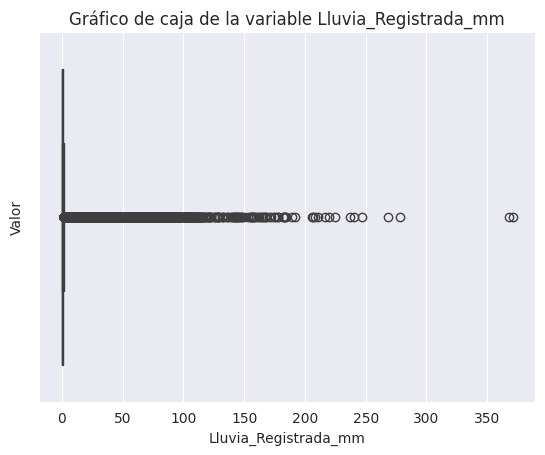

In [428]:
sns.boxplot(x=df['Lluvia_Registrada_mm'])

# Añadir título y etiquetas a los ejes
plt.title('Gráfico de caja de la variable Lluvia_Registrada_mm')
plt.xlabel('Lluvia_Registrada_mm')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

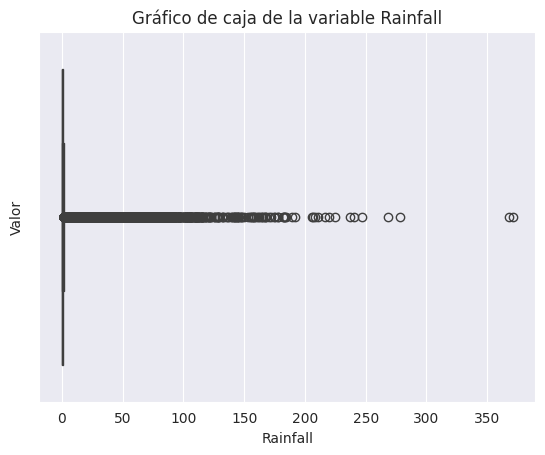

In [429]:
sns.boxplot(x=df['Lluvia_dia_mm'])

# Añadir título y etiquetas a los ejes
plt.title('Gráfico de caja de la variable Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

Estas dos variables Lluvia_dia_mm y LLuvia_Registrada_mm son variables que tienen una gran cantidad de outliers alredeor del 18 % , estos datos son atipicos y debido a la gran cantidad presente, se debe analizar mas adelante.

Variables sin outliers son : Soleado, Humedad_3pm, Nubes_9am, Nubes_3pm

## **Variables Numericas**

In [430]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Ver las primeras filas del DataFrame filtrado
df_numerico.head()


,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,VelRafaga,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Registrada_mm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


Se puede visualizar que la presion atmosferica esta en otra escala

## Estadistica Descriptiva

**Variables Numericas**

* COUNT : Cantidad de datos totales por cada variable. Nos ayuda a identificar la cantidad de datos que tiene cada variables.Se observa que 'Evaporacion', 'Soleado', 'Nubes_9am' y 'Nubes_3pm' son las que tiene una mayor cantidad de nulos.

* MEAN : La media es el promedio de los valores de la variable. Si es cercana a la mediana (50%) y la desviación estándar (STD) es pequeña, sugiere una distribución normal (gaussiana).

*  STD : STD: La desviación estándar mide la dispersión de los valores de la variable alrededor de la media. Una STD alta indica que los valores están muy dispersos, mientras que una STD baja indica que los valores están cerca de la media.

*  CUARTILES : Dividen los datos en cuatro partes iguales, ayudando a entender la distribución y detectar posibles valores atípicos.

In [431]:
df.describe()

,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,VelRafaga,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Registrada_mm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


**Análisis Descriptivo de los Cuartiles de Temperatura y Precipitación**
Al realizar un análisis preliminar de los datos de temperatura mínima y máxima, así como de las precipitaciones, se pueden observar las siguientes características destacadas en los cuartiles:

**Temperatura Mínima (MinTemp)**
* Primer Cuartil (Q1): La temperatura mínima del primer cuartil varía entre -8.5 y 7.6 grados Celsius, cubriendo un rango de aproximadamente 16 grados. Esto indica una alta variabilidad en las temperaturas más bajas. El 25% de los valores son menores o iguales a 7.6°C.

* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura oscila entre 7.6 y 12 grados Celsius, presentando un rango más estrecho de unos 4.4 grados.El 50% de los valores son menores o iguales a 12.0°C (mediana).

* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura varía de 12 a 16.8 grados Celsius, con un rango de aproximadamente 4.8 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 16.8 y 33.9 grados Celsius, mostrando un rango de aproximadamente 17 grados. Este rango más amplio sugiere que las temperaturas más altas tienen una mayor dispersión.El 75% de los valores son menores o iguales a 16.8°C.

**Temperatura Máxima (MaxTemp)**
* Primer Cuartil (Q1): La temperatura máxima del primer cuartil se sitúa entre -4.8 y 17.9 grados Celsius, cubriendo un rango de aproximadamente 22.7 grados.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura varía entre 17.9 y 22.6 grados Celsius, abarcando un rango de 4.7 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura fluctúa de 22.6 a 28.2 grados Celsius, presentando un rango de 5.6 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 28.2 y 48.1 grados Celsius, con un rango de aproximadamente 19.9 grados, mostrando una mayor dispersión en las temperaturas más altas.

**Lluvia en milimetros  (Lluvia_dia_mm)**
* Primer a Tercer Cuartil (Q1-Q3): La mayoría de los datos de precipitaciones se concentran en valores bajos, ya que los valores de los primeros tres cuartiles (Q1, Q2 y Q3) son todos 0 mm. Esto indica que no  hubo  días con precipitaciones registradas.
* Cuarto Cuartil (Q4): En el cuarto cuartil, las precipitaciones varían entre 0.8 mm y 371 mm, con un rango considerable de aproximadamente 370.2 mm. Esto sugiere que las lluvias fueron escasas pero intensas en ciertos días.El 75% de
los valores son menores o iguales a 0,8mm.

La mayoría de los días no llueve (mediana de 0 mm). Sin embargo, hay días con lluvias muy intensas, lo que explica la alta desviación estándar y el gran rango. Esto sugiere que, aunque rara vez llueve, cuando lo hace, puede ser significativo.

**Humedad_9am:**: La humedad a las 9 AM tiene una desviación estándar de 19.05%, lo que indica una variabilidad considerable. El rango completo de 0% a 100% sugiere que puede haber días extremadamente secos o muy húmedos. La mediana de 70% indica que la mitad de los días tienen una humedad relativa por encima de este valor.

**Humedad_3am** presenta grandes variaciones entre la mañana y la tarde, lo que podría influir en las condiciones climáticas diarias.

Estos análisis muestran la variabilidad en las temperaturas mínimas y máximas, con una dispersión mayor en los extremos de los cuartiles. Las precipitaciones, por otro lado, muestran que la mayoría de los días tuvieron poca o ninguna lluvia, concentrándose las precipitaciones en eventos menos frecuentes pero más intensos.

**Evaporación**: la Mediana indica que la mitad de los datos tienen valores de evaporación inferiores a 4.8 mm y la otra mitad, superiores. Tiene una desviación estándar de 4.2 mm, hay una variabilidad moderada en los valores de evaporación alrededor de la media.El rango de evaporación va desde 0 hasta 145.0 mm, indicando una variabilidad en las tasas de evaporación observadas.

**Soleado**: En promedio que es la Media, indica que hubieron alrededor de 7 a 8 horas de sol. La Mediana indica que la mitad de los días tuvieron más de 8.5 horas de sol y la otra mitad menos de eso. Es como el punto medio. La desviacion estandar, indica cuánto varían las horas de sol alrededor del promedio de 7 a 8 horas. Una desviación estándar de 3.8 horas , lo que significa que algunas veces hubo más sol del promedio y otras menos.

**Velocidad de Ráfaga** : En promedio, la velocidad máxima de ráfaga de viento fue de aproximadamente 40 km/h. La mediana indica que la mitad de las veces la ráfaga de viento fueron menor a  39 km/h y la otra mitad más. La desviación estándar es de 13.6 km/h, indica  que a veces las ráfagas eran mucho más fuertes o más suaves que el promedio de 40 km/h.

**Lluvia Registrada (mm)** El promedio (Media) se registraron alrededor de 2.4 mm de lluvia en momentos específicos medidos. Es el promedio de cuánta lluvia se midió en esos momentos. La mitad de las mediciones no registraron lluvia ya que es 0.0 mm. Con una desviación estándar de 2.4 mm,a veces la cantidad de lluvia registrada era mucho mayor o menor que el promedio de 2.4 mm.

Esta interpretación permite una mejor comprensión de las características climáticas del set de datos, proporcionando una base  para futuros análisis y modelos predictivos.

## Histograma
Revisamos la distribucion de las variables

Para identificar las variables que tienen a una distribución normal, es útil observar la media y la desviación estándar, así como considerar la simetría de los datos.
- Simetría: La distribución es simétrica alrededor de la media.
- Media y mediana iguales: La media y la mediana son aproximadamente iguales.

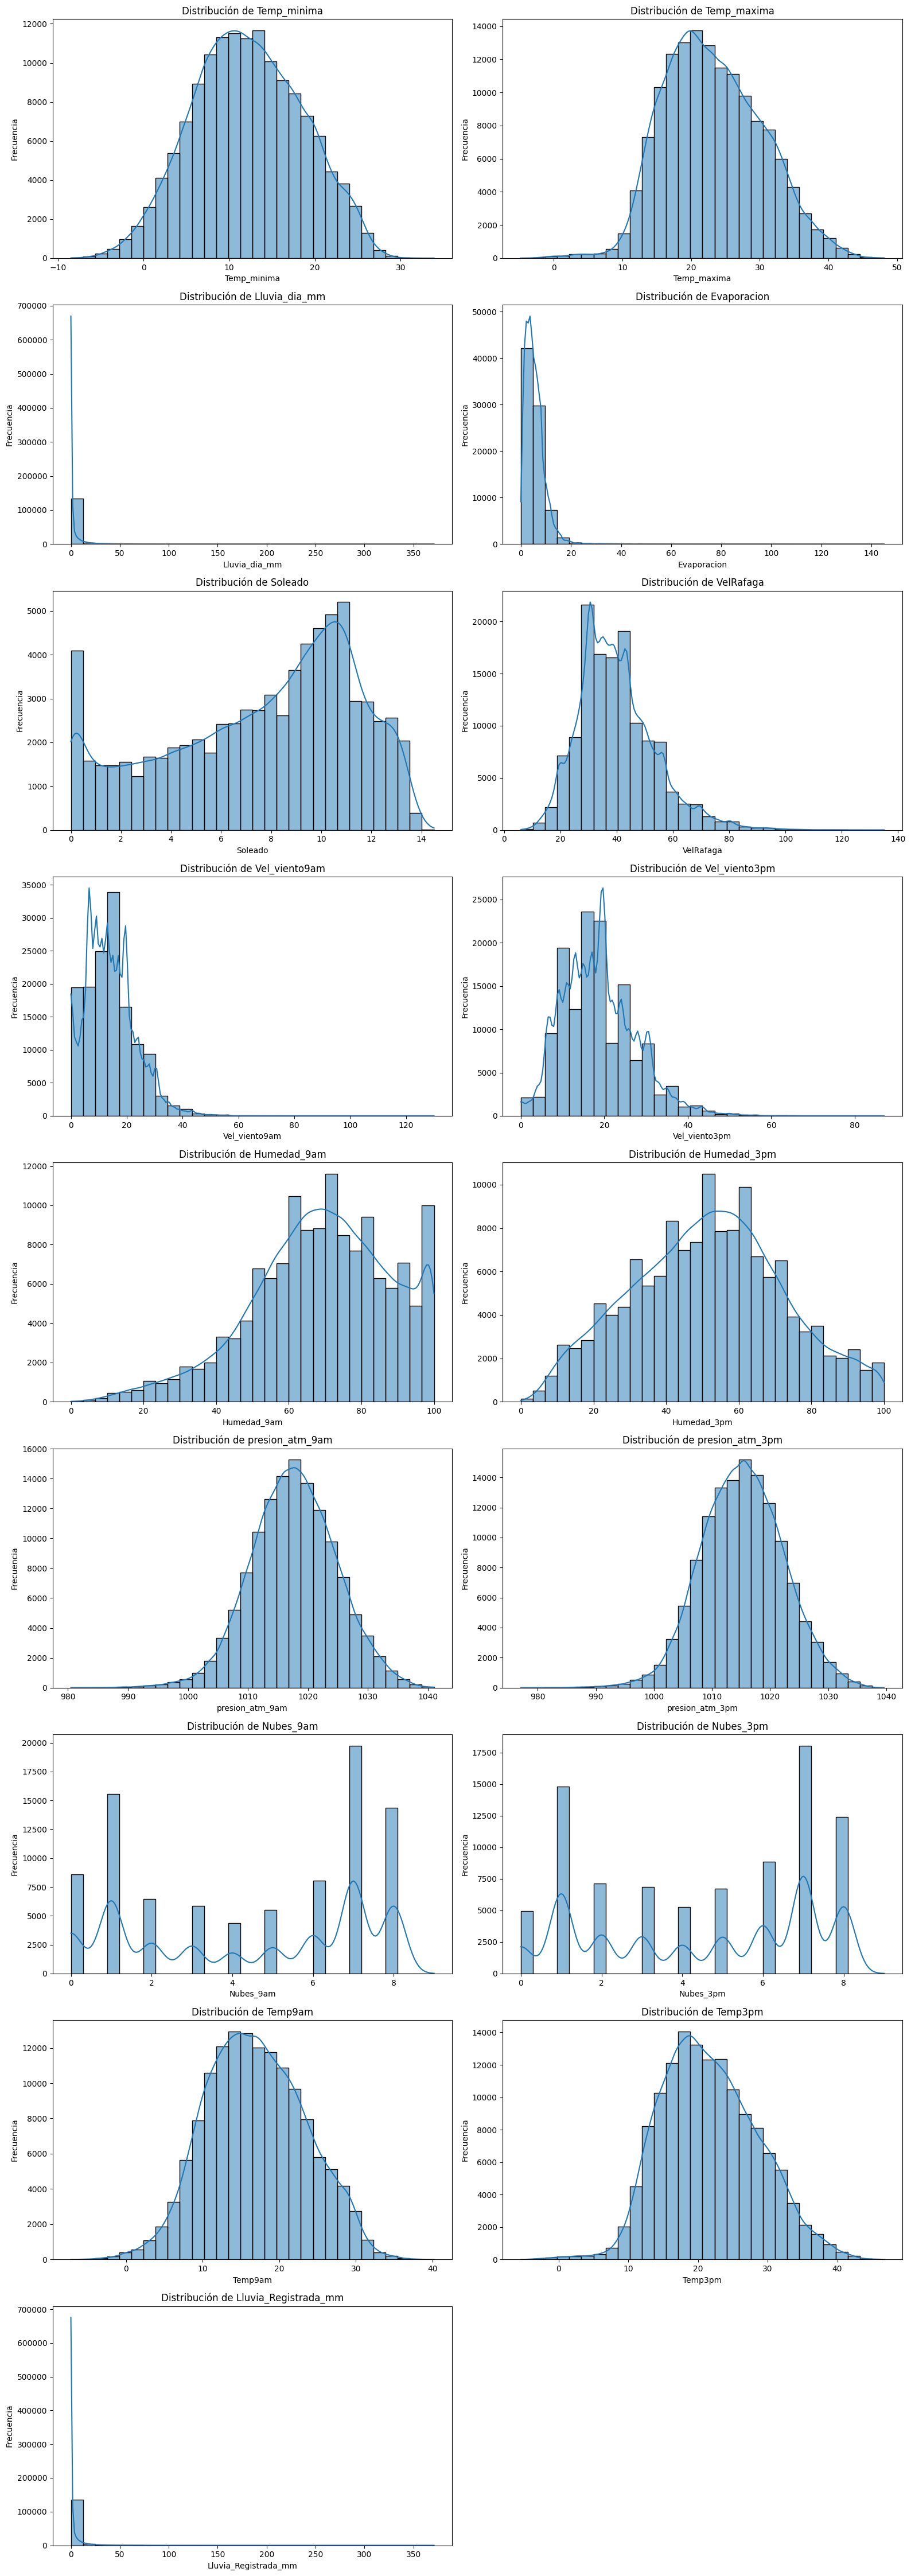

In [32]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de las figuras según la cantidad de variables
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2  # Número de filas necesarias para la cuadrícula de 2 columnas

plt.figure(figsize=(16, num_rows * 5))

# Crear un gráfico de distribución para cada variable numérica
for i, var in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i + 1)  # Crear una cuadrícula de num_rows filas y 2 columnas
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**Las variables que tienden a distribucion normal:**
- Temp_minima y Temp_maxima:Se observa la forma de campana simetrica, con la mayoria de los valores  en el centro. Ambos tienen una media cercana a la mediana, lo que sugiere una posible distribución normal.Tem_max tiene una pequeña cola hacia la derecha, (asimetria positiva).
- Temp9am y Temp3pm: También muestran una media cercana a la mediana con tendencia a distribucion normal.
- Humedad_9am , Humedad_3pm: ambas indican una distribucion normal con cierta tendencia hacia la derecha.
- Presion_atmos_9am, presion_atmosf_3am se visualizan con tendencia a una distribucion normal.
- Lluvia_mm : Se visualiza que tiene una distribucion asimetrica positiva alta,indica que hay muchos dias con escasa o sin lluvia, y pocos con gran cantidad de lluvia .

**Otras Distribuciones**  
- Evaporacion :Los datos se concentran entre 0 y 20,con una distribucion asimetrica postiva. Se concluye quelos valores bajos son mas comunes que los valores sobre 20s.
- Soleado :La gran cantidad de datos faltantes en esta columna puede confundirse con 0, lo que lleva a una mala interpretación de los datos, sugiriendo incorrectamente que hay muchos momentos sin sol. Es necesario verificar si los ceros son realmente ceros o valores nulos.

- Vel_viento9mm: La media es de 23.23 km/h con una desviación estándar de 7.12 km/h. La mayoría de los datos varían entre 17.9 km/h y 28.2 km/h, con un máximo de 48.1 km/h.

- Vel_viento3pm: La distribución  tiene un asimetria positiva y una cola que se extiende hacia la derecha. Indica  que la velocidad del viento que son más comunes son  baja a moderada velocidad.También hay algunos valores altos.

- Nube_9am : La  fracción del cielo cubierto por nubes a las 9am,los niveles de nubosidad  más frecuentes  como:  1 y 7.
- Nube_3pm : la distribución tiene varios  niveles de nubosidad, resaltan el rango 1 y 7 comolos mas frecuentes.

- Lluvia_Registrada_mm : La mayoria de los datos estan concentrados alrededor  de 0 y 7 , lo que indica que casi no llueve . La distribución es altamente  asimetrica positiva con una cola a la derecha extensa ya que hay algunos valores con mucha lluvia mayor que 350mm.Indicando la presencia de días con lluvia extremadamente alta, aunque son raros.

###**Correlacion**

Se calcula la correlación de las columnas numéricas lo permite ver fácilmente las relaciones entre las diferentes variables climáticas, destacando tanto las correlaciones positivas como las negativas  

In [246]:
corr = df.corr(numeric_only=True)
corr


,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,VelRafaga,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Registrada_mm
Temp_minima,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
Temp_maxima,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Lluvia_dia_mm,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporacion,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Soleado,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
VelRafaga,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
Vel_viento9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
Vel_viento3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humedad_9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humedad_3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


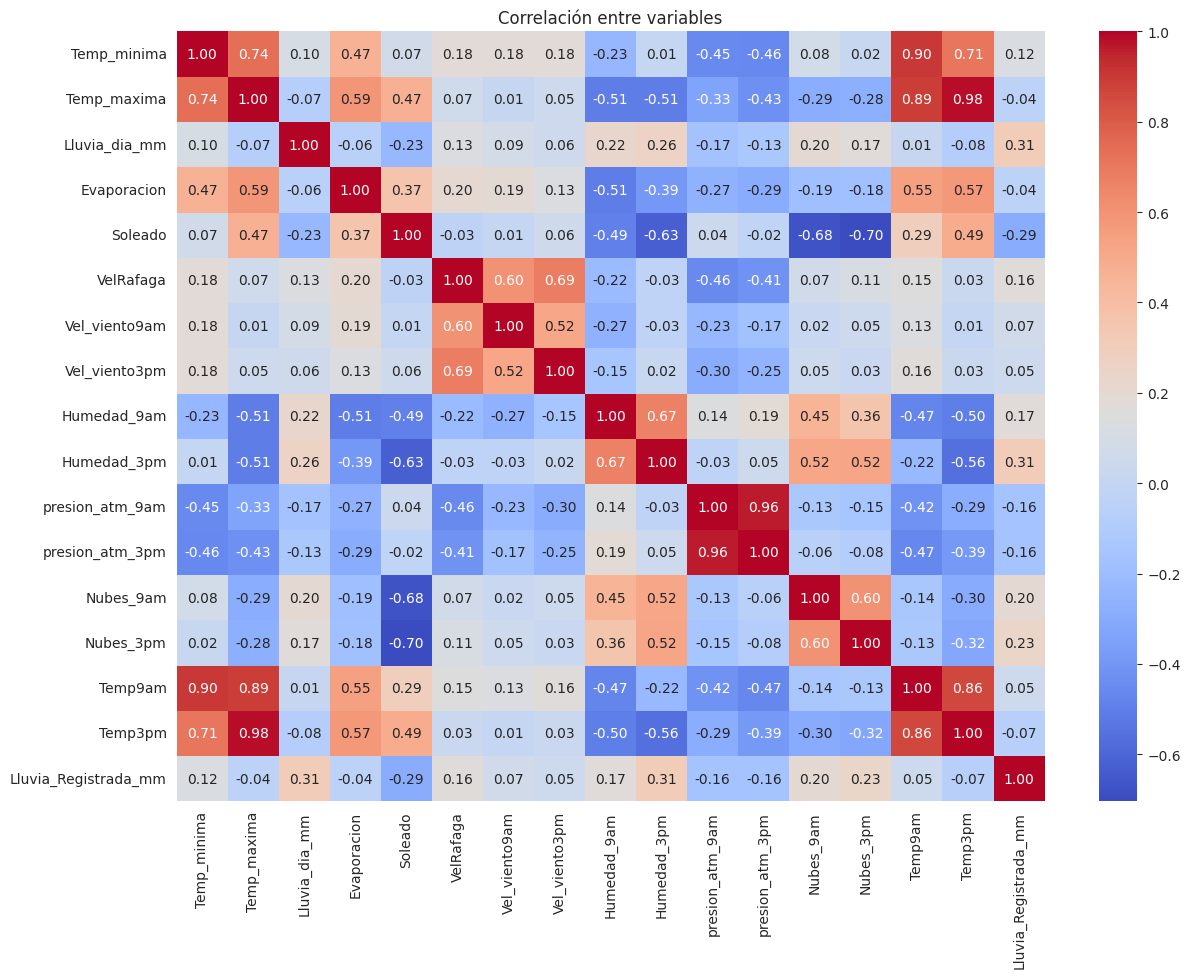

In [247]:
# Visualizar la correlación entre las variables
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlación entre variables')
plt.show()



Se analiza la correlación que existe en las variables entre si,  teniendo en cuenta que aunque exista correlación no necesariamente implica que exista causalidad.<br>
Se observa que existen correlaciones tanto positivas como negativas.

**Correlaciones Fuertes y Positivas:**
* MinTemp y MaxTemp (0.736): La temperatura mínima y máxima diarias están fuertemente correlacionadas, lo que indica que los días más cálidos tienden a tener tanto temperaturas mínimas como máximas más altas.
* MaxTemp y Temp3pm (0.985): La temperatura máxima del día está muy fuertemente correlacionada con la temperatura a las 3 PM. Se entiende quelas temperaturas más altas del día suelen registrarse por la tarde.
* Temp9am y Temp3pm (0.861): Las temperaturas registradas a las 9 AM y a las 3 PM están fuertemente correlacionadas, indican que si la mañana es cálida, la tarde también lo será.

**Correlaciones Fuertes y Negativas:**
* Temp_maxima y Humedad3pm (-0.509): La temperatura máxima está inversamente correlacionada con la humedad a las 3 PM. Los días más cálidos suelen tener menor humedad por la tarde.
* Soleado y Humedad_3pm (-0.629): La cantidad de horas de sol está inversamente correlacionada con la humedad a las 3 PM, indicando que días más soleados tienden a ser menos húmedos.
* Soleado y Nubes_3pm (-0.704): La cantidad de sol está fuertemente inversamente correlacionada con la nubosidad a las 3 PM. Esto es lógico ya que más sol significa menos nubes.

## **Variables Categoricas**

In [248]:
# Seleccionar solo las columnas de tipo object
df_obj = df.select_dtypes(include=['object'])
df_obj

Estas son las variables Categoricas de este dataset:

In [249]:
df_obj.columns

Index(['Fecha', 'Localidad', 'DirRafaga', 'Dir_viento9am', 'Dir_viento3pm',
       'Lluvia_Hoy', 'Lluvia_Mañana'],
      dtype='object')

**Grafico de barra**

Se muestra la frecuencia de cada clase en la respectiva columna ,  permiten visualizar rápidamente qué clase son más comunes en cada variable categórica.
- Tambien permite ver el balanceo de las clases.

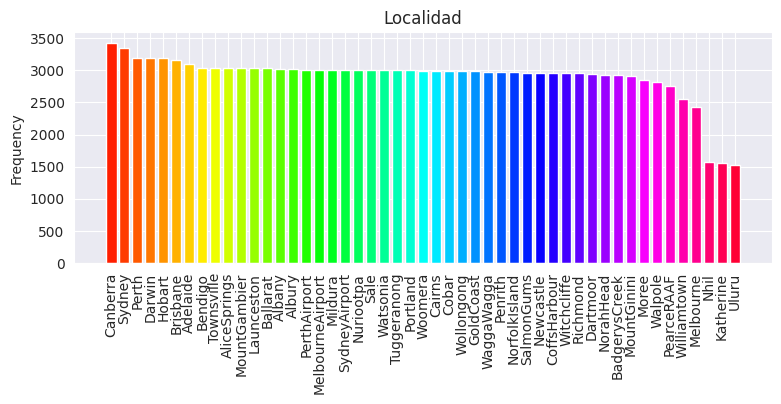

Localidad:
Localidad
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
Badg

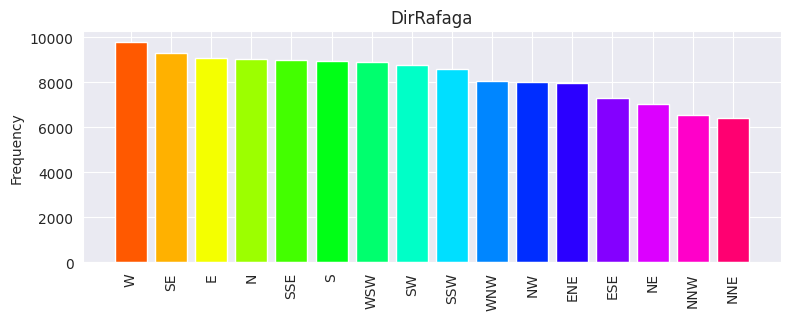

DirRafaga:
DirRafaga
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64


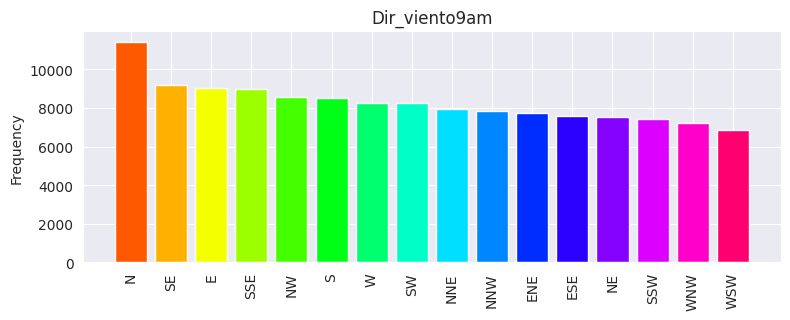

Dir_viento9am:
Dir_viento9am
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: count, dtype: int64


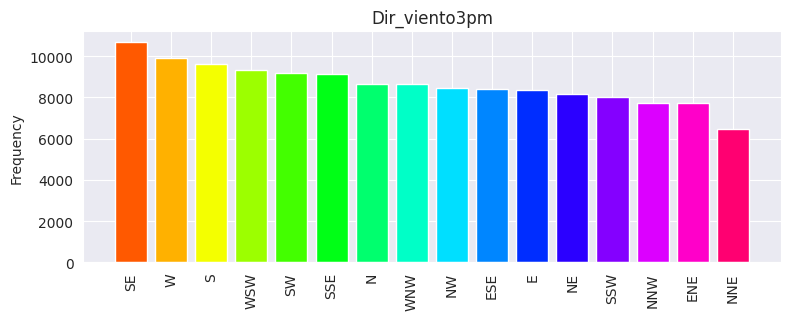

Dir_viento3pm:
Dir_viento3pm
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: count, dtype: int64


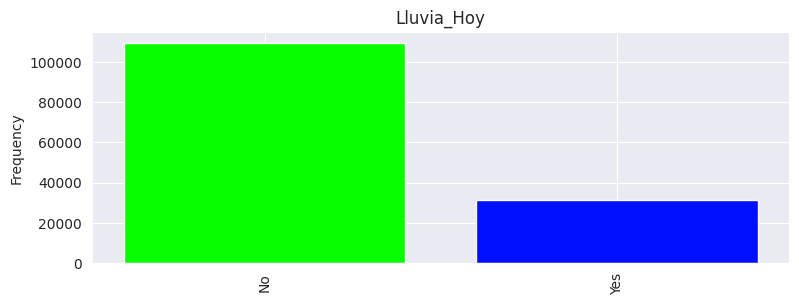

Lluvia_Hoy:
Lluvia_Hoy
No     109332
Yes     31455
Name: count, dtype: int64


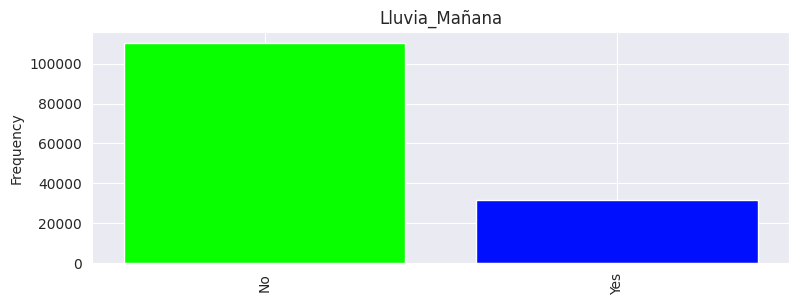

Lluvia_Mañana:
Lluvia_Mañana
No     110316
Yes     31877
Name: count, dtype: int64


In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your bar_plot function
def bar_plot(variable):
    # Get feature
    var = df[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()

    # Define a colormap
    colors = sns.color_palette('hsv', len(varValue))

    # Visualize
    plt.figure(figsize=(9, 3))

    plt.bar(varValue.index, varValue, color=colors)

    # Rotate x-ticks for better readability
    plt.xticks(rotation=90)

    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable, varValue))

# Set seaborn style
sns.set_style('darkgrid')

# Convert Fecha to string if it's datetime
df['Fecha'] = df['Fecha'].astype(str)

# Assuming you have a list of categorical variables
categorical_list = [ 'Localidad', 'DirRafaga', 'Dir_viento9am', 'Dir_viento3pm',
       'Lluvia_Hoy', 'Lluvia_Mañana']

# Loop through the list and create bar plots
for c in categorical_list:
    bar_plot(c)


Lluvia_hoy y Lluvia_mañana estan desbalanceadas, significa que una de las clases está mucho más frecuente que la otra. Esto puede afectar la capacidad del  modelo para aprender correctamente las relaciones entre las características y las etiquetas. Se pueden aplicar tecnicas para manejar estas clases, como SMOTE, oversampling, undersampling.

DirRafaga: Mayor cantidad de datos de los vientos son  oeste(W) y sureste(SE),y las cantidades menores son noroeste(NNW) y noreste(NNE)

Dir_viento9am:En la mañana la rafaga del viento predominante es la norte, ya que se concentra la mayor cantidda de datos.

Dir_viento3pm: Direccion de viento predominate es  SE, siguiendo  W, S.

Localidad tiene una distribucion homologenea de datos , pero Nhil, Katherine y Uluru tienen menos datos.

##**Estadísticas descriptivas**

**Variables Categoricas**

- COUNT : Cantidad de datos en la Variable
- UNIQUE : Esto representa la cantidad de datos unicos en la columna.
- TOP : Es el valor mas frecuente de la columna
- FREQ : Este es el numero de veces que se repite el valor de TOP.

In [251]:
df_obj.describe()

,Fecha,Localidad,DirRafaga,Dir_viento9am,Dir_viento3pm,Lluvia_Hoy,Lluvia_Mañana
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


Fecha:   tiene 3436 fechas únicas. Esto significa que en tu conjunto de datos hay 3436 fechas distintas registradas. La gran cantidad de fechas indica que el dataset cubre un largo período de tiempo. La fecha más frecuente apareciendo solo 49 veces sugiere una distribución relativamente uniforme de datos a lo largo del tiempo.

localidad: El dataset abarca datos de 49 diferentes ubicaciones, con Canberra siendo la más representada. Esto podría indicar que Canberra tiene más estaciones de medición o que los datos de esta ubicación se recopilaron con más frecuencia.

DirRafaga: El viento sopla predominantemente desde el oeste (W)en las observaciones, lo cual podría ser relevante para entender patrones climáticos en la región. Tiene 9330 nulos

Dir_viento9am: A las 9 de la mañana, el viento más frecuentemente viene del norte (N). Esto puede ayudar a identificar patrones diurnos en la dirección del viento.Tiene 10.013 nulos

Dir_viento3pm: A las 3 de la tarde, la dirección del viento más común cambia a sureste (SE), lo cual sugiere una posible variación diurna en los patrones del viento.Tiene 3778 datos nulos

Lluvia_hoy: La mayoría de los días no llueve, con una frecuencia alta de "No" en comparación con "Sí". Esto podría indicar un clima predominantemente seco en las ubicaciones registradas.Tiene 1406 nulos.

Lluvia_mañana: Similar a Lluvia_hoy, la previsión para el día siguiente también muestra una alta frecuencia de "No", reforzando la idea de un clima predominantemente seco.

**Inferencias:**

Fecha: Los datos están distribuidos uniformemente a lo largo del tiempo, lo que sugiere un período de observación extenso.

Localidad: Canberra es la ubicación con más datos.

Patrones de Viento: Las direcciones predominantes del viento (W, N, SE) en diferentes momentos del día pueden indicar patrones climáticos regionales importantes.

Lluvia: La frecuencia alta de "No" en Lluvia_hoy y Lluvia_mañana sugiere un clima seco en general, lo cual es crucial para cualquier análisis relacionado con la precipitación.


**Revisan las Clases**

Separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal

In [252]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
for col in df_obj:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Fecha: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']3436 subniveles
Columna Localidad: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']49 subniveles
Columna DirRafaga: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']16 subniveles
Columna Dir_viento9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']16 subniveles
Columna Dir_viento3pm:

Rango de la fechas es : De 2008-12-01 a 2008-01-31.

Direccion del viento son 16 direcciones unicas

###**Variable Localidad**

### Ciudades de Australia, que registran su clima

In [253]:
print(f'Las ciudades en el dataset son: {df["Localidad"].unique()}')
print(f'Siendo un total de {len(df["Localidad"].unique())} ciudades')

Las ciudades en el dataset son: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Siendo un total de 49 ciudades


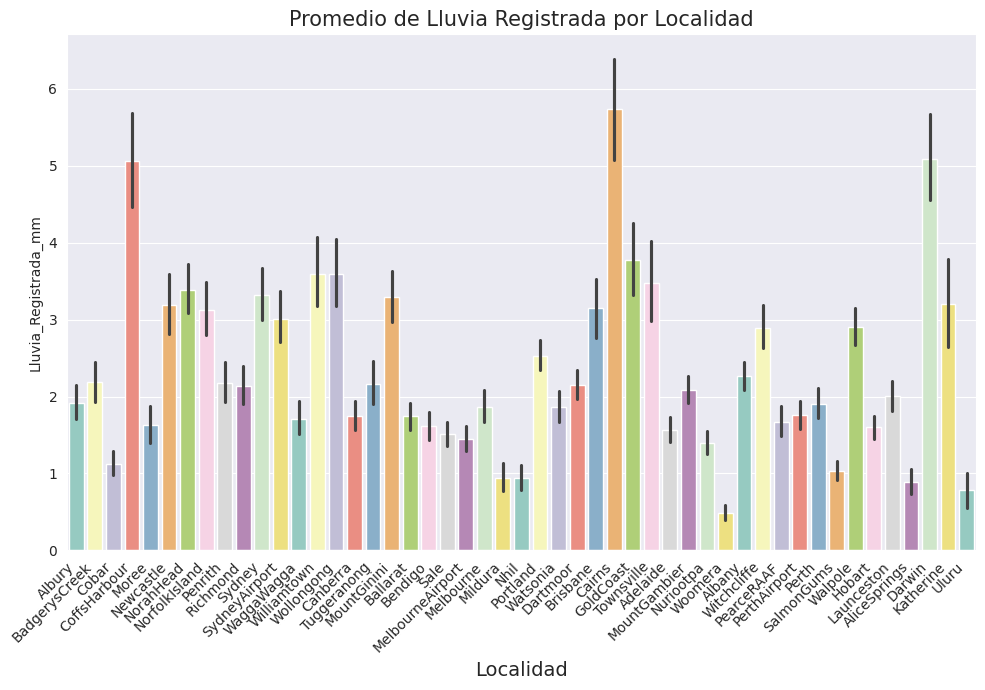

In [254]:
plt.figure(figsize=(10, 7))  # Tamaño de la figura

# Crear un gráfico de barras usando Seaborn
sns.barplot(x=df['Localidad'], y=df['Lluvia_Registrada_mm'], palette="Set3")

# Etiquetas y título
plt.ylabel('Lluvia_Registrada_mm')  # Etiqueta del eje y
plt.xlabel('Localidad', fontsize=14)  # Etiqueta del eje x con tamaño de fuente
plt.xticks(rotation=45, ha='right')  # Rotación de las etiquetas del eje x para mejor visualización
plt.title('Promedio de Lluvia Registrada por Localidad', fontsize=15)  # Título del gráfico

plt.tight_layout()  # Ajustar el diseño para evitar cortes de etiquetas

plt.show()  # Mostrar el gráfico


Se puede observar que la localidad de las estaciones meteorologicas , que tiene la mayor cantidad de lluvia registrada en mm es Cairns,despues Darwin y en tercer lugar CoffsHarbours. Estas clases se pueden agrupar por region para tener un analisis mas global y comprensible.

###**Variable Fecha**



La variable Fecha se descompone para identificar los peridos de lluvia segun el año y el mes , para entender el comportamiemto meteorologico segun estacion del año.

In [255]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [256]:
# Descompone la fecha
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Dia_semana'] = df['Fecha'].dt.dayofweek  # Lunes=0, Domingo=6
df['Día_nombre'] = df['Fecha'].dt.day_name()

# Mostrar el DataFrame con las nuevas columnas
df.head()


,Fecha,Localidad,Temp_minima,Temp_maxima,Lluvia_dia_mm,Evaporacion,Soleado,DirRafaga,VelRafaga,Dir_viento9am,Dir_viento3pm,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Hoy,Lluvia_Registrada_mm,Lluvia_Mañana,Año,Mes,Día,Dia_semana,Día_nombre
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1,0,Monday
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2,1,Tuesday
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3,2,Wednesday
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4,3,Thursday
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5,4,Friday


In [257]:
categoricas_columna= ['Fecha', 'Localidad','Día_nombre']  # Lista de columnas categóricas originales
df_categ = df[categoricas_columna].copy()

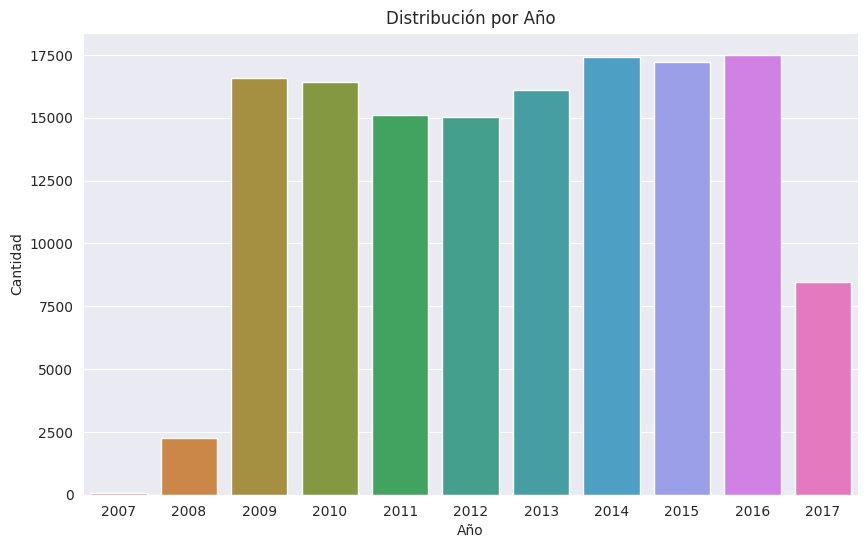

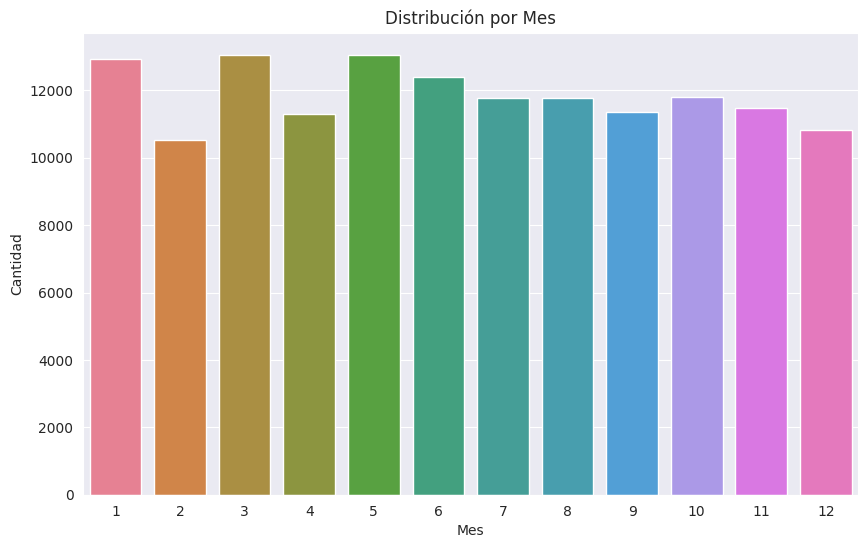

In [258]:
# Contar la cantidad de ocurrencias por año
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Año', data=df, palette='husl', ax=ax)
ax.set_title('Distribución por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')
plt.show()

# Contar la cantidad de ocurrencias por mes
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Mes', data=df, palette='husl', ax=ax)
ax.set_title('Distribución por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')
plt.show()

Los gráficos de año y meses nos muestran una distribucion :

Años:  La mayoría de los años tiene una cantidad de datos equilibrado , excepto para 2007 y 2008, que tienen menos datos.

Meses: Esta distribucion tiene una cantidad de datos por mes bastante equilibrada .







# **Fase 3. Preparación de los Datos**



Preprocesamiento de Datos:

 Limpiar los datos, manejar valores faltantes, transformar variables categóricas  

##**Limpieza de Datos**

Se preparan los datos de manera adecuada para evitar problemas de sobreajuste o subajuste en los modelos y  se realizan  las siguientes transformaciones:




In [259]:
# Comprobar qué columnas están presentes en el DataFrame
print("Columnas disponibles en el DataFrame:", df.columns)


Columnas disponibles en el DataFrame: Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'Evaporacion', 'Soleado', 'DirRafaga', 'VelRafaga', 'Dir_viento9am',
       'Dir_viento3pm', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana', 'Año', 'Mes', 'Día', 'Dia_semana', 'Día_nombre'],
      dtype='object')


##Manejo de Valores Nulos

Este código imputa los valores nulos en las columnas utilizando la media , mediana , moda segun corresponda, calculada dentro de cada grupo de Localidad.

Esto significa que los valores nulos se reemplazarán con el promedio,mediana, moda  de la columna para la Localidad correspondiente, asegurando que la imputación tenga en cuenta las diferencias entre distintas localidades.

In [260]:
# Verificar y ordenar la cantidad de valores nulos por columna de mayor a menor
nulos = df.isnull().sum().sort_values(ascending=False)
nulos

Soleado                 67816
Evaporacion             60843
Nubes_3pm               57094
Nubes_9am               53657
presion_atm_9am         14014
presion_atm_3pm         13981
Dir_viento9am           10013
DirRafaga                9330
VelRafaga                9270
Dir_viento3pm            3778
Humedad_3pm              3610
Temp3pm                  2726
Vel_viento3pm            2630
Humedad_9am              1774
Lluvia_dia_mm            1406
Lluvia_Hoy               1406
Vel_viento9am            1348
Temp9am                   904
Temp_minima               637
Temp_maxima               322
Dia_semana                  0
Año                         0
Día                         0
Mes                         0
Fecha                       0
Lluvia_Mañana               0
Lluvia_Registrada_mm        0
Localidad                   0
Día_nombre                  0
dtype: int64

**Cantidad de valores nulos en varias columnas específicas del df**

In [261]:
print(f'Cantidad de valores nulos en columna Temp_minima: {df["Temp_minima"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp_maxima: {df["Temp_maxima"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humedad_9am: {df["Humedad_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humedad_3pm: {df["Humedad_3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Vel_viento9am: {df["Vel_viento9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Vel_viento3pm: {df["Vel_viento3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna presion_atm_9am: {df["presion_atm_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["presion_atm_3pm"].isna().sum()}')

Cantidad de valores nulos en columna Temp_minima: 637
Cantidad de valores nulos en columna Temp_maxima: 322
Cantidad de valores nulos en columna Humedad_9am: 1774
Cantidad de valores nulos en columna Humedad_3pm: 3610
Cantidad de valores nulos en columna Temp9am: 904
Cantidad de valores nulos en columna Temp3pm: 2726
Cantidad de valores nulos en columna Vel_viento9am: 1348
Cantidad de valores nulos en columna Vel_viento3pm: 2630
Cantidad de valores nulos en columna presion_atm_9am: 14014
Cantidad de valores nulos en columna Pressure3pm: 13981


In [262]:
df1=df

In [263]:
df_ej=df

Se imputan los valores nulos por la media

###**Imputación por la Media**
Se utiliza la Media (Promedio)cuando los datos están distribuidos de manera aproximadamente normal.(Temp_minima,Temp_maxima, temp_9am,temp3pm, humedad_3pm, Nubes_9am,Nubes3_pm)

**Variable MinTemp**

Se imputa los valores nulos por el promedio temperaturas minimas por cada localidad, para no afectar la caracteristica de cada localizacion

 **Temp_minima**: Evaluamos los valores nulos, tiene 637 datos

In [467]:
df["Temp_minima"].isna().sum()

637

In [468]:
df["Temp_minima"].mean()

12.186399728729265

Se calcula el promedio de la temperatura mínima (Temp_minima) para cada ubicación (Localizacion) del conjunto de datos.

In [469]:
promedio_Temp_minima= df.groupby("Localidad")["Temp_minima"].mean()
promedio_Temp_minima

Localidad
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359



Ahora se reemplazan los valores faltantes en la columna "Temp_minima" del DataFrame utilizando el promedio de la temperatura mínima para cada ubicación. Con este codigo remmplazamos los valores nulos de esa columna y mantenemos los promedios originales

In [470]:
df["Temp_minima"] = df["Temp_minima"].fillna(df.groupby("Localidad")["Temp_minima"].transform("mean"))

Y de esa manera nos deshacemos de los valores nulos de esa columna mientras mantenemos los promedios originales

In [471]:
df["Temp_minima"].isna().sum()

0

Se revisa nuevamente la variable Temp_minima, y se observa que no tiene valores nulos.

**Imputación de los valores nulos**

Se utiliza el promedio de los valores no nulos,y se  agrupan por la columna "Localidad".

In [472]:
df["Temp_maxima"] = df["Temp_maxima"].fillna(df.groupby("Localidad")["Temp_maxima"].transform("mean"))

df["Humedad_9am"] = df["Humedad_9am"].fillna(df.groupby("Localidad")["Humedad_9am"].transform("mean"))
df["Humedad_3pm"] = df["Humedad_3pm"].fillna(df.groupby("Localidad")["Humedad_3pm"].transform("mean"))

df["Temp9am"] = df["Temp9am"].fillna(df.groupby("Localidad")["Temp9am"].transform("mean"))
df["Temp3pm"] = df["Temp3pm"].fillna(df.groupby("Localidad")["Temp3pm"].transform("mean"))

df["Vel_viento9am"] = df["Vel_viento9am"].fillna(df.groupby("Localidad")["Vel_viento9am"].transform("mean"))
df["Vel_viento3pm"] = df["Vel_viento3pm"].fillna(df.groupby("Localidad")["Vel_viento3pm"].transform("mean"))

df["presion_atm_9am"] = df["presion_atm_9am"].fillna(df.groupby("Localidad")["presion_atm_9am"].transform("mean"))
df["presion_atm_3pm"] = df["presion_atm_3pm"].fillna(df.groupby("Localidad")["presion_atm_3pm"].transform("mean"))


En resumen, este código realiza una imputación de los valores nulos en las columnas mencionadas utilizando el promedio de los valores no nulos agrupados por la ubicación. Esto ayuda a preservar la coherencia geográfica en los datos al imputar valores faltantes

In [473]:
print(f'Cantidad de valores nulos en columna Temp_maxima: {df["Temp_maxima"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humedad_9am: {df["Humedad_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humedad_3pm: {df["Humedad_3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Vel_viento9am: {df["Vel_viento9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Vel_viento3pm: {df["Vel_viento3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna presion_atm_9am: {df["presion_atm_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna presion_atm_3pm: {df["presion_atm_3pm"].isna().sum()}')

Cantidad de valores nulos en columna Temp_maxima: 0
Cantidad de valores nulos en columna Humedad_9am: 0
Cantidad de valores nulos en columna Humedad_3pm: 0
Cantidad de valores nulos en columna Temp9am: 0
Cantidad de valores nulos en columna Temp3pm: 0
Cantidad de valores nulos en columna Vel_viento9am: 0
Cantidad de valores nulos en columna Vel_viento3pm: 0
Cantidad de valores nulos en columna presion_atm_9am: 11781
Cantidad de valores nulos en columna presion_atm_3pm: 11781


###**Imputar por la mediana**

Se imputa por la Mediana para datos con distribuciones sesgadas o cuando hay outliers.

**Variable presion_atm_3pm, presion_atm_9am**

In [474]:
subnulos = df[['Localidad', 'presion_atm_9am', 'presion_atm_3pm']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Localidad').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])


             Localidad  presion_atm_9am  presion_atm_3pm
Localidad                                               
MountGinini          0             2907             2907
Newcastle            0             2955             2955
Penrith              0             2964             2964
SalmonGums           0             2955             2955


El hecho de que todavía existan valores nulos en las columnas "presion_atm_9am" y "presion_atm_3pm" después de la imputación utilizando el promedio agrupado por ubicación , ocurre porque algunas ubicaciones tienen muchos valores nulos en esas columnas, lo que afecta la capacidad de la imputación basada en la media agrupada por ubicación.<br>
Dado que la variación en la presión atmosférica no es muy significativa y que hay relativamente pocos valores nulos en comparación con el tamaño total del conjunto de datos, se utiliza la mediana del conjunto de datos completo para imputar estos valores nulos, ya que la mediana es menos sensible a valores atípicos que la media.

In [475]:
# Calcular la mediana de las columnas 'presion_atm_9am' y 'Pressure3pm'
median_presion_atm_9am = df['presion_atm_9am'].median()
median_pressure3pm = df['presion_atm_3pm'].median()

# Llenar los valores faltantes con la mediana calculada
df['presion_atm_9am'].fillna(median_presion_atm_9am, inplace=True)
df['presion_atm_3pm'].fillna(median_pressure3pm, inplace=True)


In [476]:
print(f'Cantidad de valores nulos en columna presion_atm_9am después de la imputación: {df["presion_atm_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna presion_atm_3pm después de la imputación: {df["presion_atm_3pm"].isna().sum()}')


Cantidad de valores nulos en columna presion_atm_9am después de la imputación: 0
Cantidad de valores nulos en columna presion_atm_3pm después de la imputación: 0


**Escalamiento**

Para hacer el escalamiento , se divide el valor de presión en hPa por el factor de conversión 68,947, lo que proporciona el valor equivalente en psi.

In [477]:
print( df['presion_atm_3pm'].sample(1) )
print( df['presion_atm_9am'].sample(1) )

133610    1010.3
Name: presion_atm_3pm, dtype: float64
77490    1004.1
Name: presion_atm_9am, dtype: float64


In [478]:
df['presion_atm_3pm'] = df['presion_atm_3pm'] / 68.947
df['presion_atm_9am'] = df['presion_atm_9am'] / 68.947


In [479]:
print( df['presion_atm_3pm'].sample(1) )
print( df['presion_atm_9am'].sample(1) )

79475    14.657636
Name: presion_atm_3pm, dtype: float64
16180    14.759163
Name: presion_atm_9am, dtype: float64


**Variables Nubes_3pm y Nubes_9am**

Usaremos la mediana para imputar los datos faltantes.

Nubes_3pm  y Nubes_9am: indica fracción del cielo cubierto por nubes y qué tan nublado estaba el cielo segun hora del dia.

In [480]:
df[['Nubes_9am','Nubes_3pm']].isna().sum()

Nubes_9am    53657
Nubes_3pm    57094
dtype: int64

In [481]:
df["Nubes_9am"] = df.groupby("Localidad")["Nubes_9am"].transform(lambda x: x.fillna(x.mean()))
df["Nubes_3pm"] = df.groupby("Localidad")["Nubes_3pm"].transform(lambda x: x.fillna(x.mean()))


In [482]:
print(f'Cantidad de valores nulos en columna Nubes_9am: {df["Nubes_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Nubes_3pm: {df["Nubes_3pm"].isna().sum()}')


Cantidad de valores nulos en columna Nubes_9am: 34034
Cantidad de valores nulos en columna Nubes_3pm: 34034


In [483]:
df["Nubes_9am"] = df["Nubes_9am"].fillna(df.groupby("Localidad")["Nubes_9am"].transform("median"))
df["Nubes_3pm"] = df["Nubes_3pm"].fillna(df.groupby("Localidad")["Nubes_3pm"].transform("median"))

In [484]:

print(f'Cantidad de valores nulos en columna Nubes_9am: {df["Nubes_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Nubes_3pm: {df["Nubes_3pm"].isna().sum()}')

Cantidad de valores nulos en columna Nubes_9am: 34034
Cantidad de valores nulos en columna Nubes_3pm: 34034


Revisamos la localidad para las variables  , ya que al parecer existen localidades donde todos sus datos son nulos por lo cual no se puede determinar la mediana.

In [485]:
subnulos = df[['Localidad', 'Nubes_9am', 'Nubes_3pm']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Localidad').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])

               Localidad  Nubes_9am  Nubes_3pm
Localidad                                     
Adelaide               0       3090       3090
BadgerysCreek          0       2928       2928
Dartmoor               0       2943       2943
GoldCoast              0       2980       2980
MountGinini            0       2907       2907
Nhil                   0       1569       1569
NorahHead              0       2929       2929
Penrith                0       2964       2964
SalmonGums             0       2955       2955
Tuggeranong            0       2998       2998
Walpole                0       2819       2819
Witchcliffe            0       2952       2952


Los valores nulos se mantienen en ciertas localidades a pesar de la imputación por grupo. Esto sugiere que, para algunas localidades, todas las observaciones en las columnas Nubes_9am y Nubes_3pm son nulas, lo que hace que la imputación basada en la mediana de esas localidades sea ineficaz.

In [486]:
# Paso 1: Imputar valores nulos con la media de cada grupo 'Localidad'
df["Nubes_9am"] = df.groupby("Localidad")["Nubes_9am"].transform(lambda x: x.fillna(x.mean()))
df["Nubes_3pm"] = df.groupby("Localidad")["Nubes_3pm"].transform(lambda x: x.fillna(x.mean()))

# Paso 2: Imputar cualquier valor nulo restante con la media global
df["Nubes_9am"] = df["Nubes_9am"].fillna(df["Nubes_9am"].mean())
df["Nubes_3pm"] = df["Nubes_3pm"].fillna(df["Nubes_3pm"].mean())

# Verificar la imputación de valores nulos
print(f'Cantidad de valores nulos en columna Nubes_9am: {df["Nubes_9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Nubes_3pm: {df["Nubes_3pm"].isna().sum()}')


Cantidad de valores nulos en columna Nubes_9am: 0
Cantidad de valores nulos en columna Nubes_3pm: 0


Agrupamos por Localidad y rellenamos los nulos con la media del grupo.

 Para cualquier valor nulo restante, rellenamos con la media global de la columna.

In [487]:
df.isnull().sum()

Fecha                       0
Localidad                   0
Temp_minima                 0
Temp_maxima                 0
Lluvia_dia_mm            1406
Evaporacion             60843
Soleado                 67816
DirRafaga                9330
VelRafaga                9270
Dir_viento9am           10013
Dir_viento3pm            3778
Vel_viento9am               0
Vel_viento3pm               0
Humedad_9am                 0
Humedad_3pm                 0
presion_atm_9am             0
presion_atm_3pm             0
Nubes_9am                   0
Nubes_3pm                   0
Temp9am                     0
Temp3pm                     0
Lluvia_Hoy               1406
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
dtype: int64

###**Imputacion por Moda :**

Cuando hay un valor que se repite con mayor frecuencia ,puede ser útil para variables numéricas discretas y comúnmente utilizado para variables categóricas

**Variable VelRafaga**

Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.

In [488]:
df['VelRafaga'].mode()

0    35.0
Name: VelRafaga, dtype: float64

In [489]:
print( df['VelRafaga'].sample(5) )

94917    35.0
29621     NaN
91631    31.0
21033    46.0
95196    20.0
Name: VelRafaga, dtype: float64


In [490]:
df[["VelRafaga"]].isna().sum()

VelRafaga    9270
dtype: int64

In [491]:
df['VelRafaga'] = df['VelRafaga'].fillna(df['VelRafaga'].mode()[0])

In [492]:
df[["VelRafaga"]].isna().sum()

VelRafaga    0
dtype: int64

##**Valores Nulos datos Categoricos**

###**Eliminan nulos : Variable Lluvia_Hoy**

In [493]:
print(df['Lluvia_Hoy'].isnull().sum())


1406


La cantidad de registros por ciudad en el dataset variaron muy poco respecto al total general.

In [494]:
null_rain_today_by_Localidad = df.groupby('Localidad')['Lluvia_Hoy'].apply(lambda x: x.isnull().sum())
print(null_rain_today_by_Localidad)


Localidad
Adelaide             70
Albany               20
Albury               20
AliceSprings          6
BadgerysCreek        51
Ballarat             11
Bendigo               4
Brisbane             29
Cairns               24
Canberra             16
Cobar                 8
CoffsHarbour         13
Dartmoor              4
Darwin                0
GoldCoast            56
Hobart                5
Katherine            14
Launceston            8
Melbourne           137
MelbourneAirport      0
Mildura               2
Moree                63
MountGambier          8
MountGinini          91
Newcastle            26
Nhil                  4
NorahHead            41
NorfolkIsland        20
Nuriootpa             6
PearceRAAF          116
Penrith              53
Perth                 0
PerthAirport          0
Portland             12
Richmond             45
Sale                  8
SalmonGums           14
Sydney                6
SydneyAirport         4
Townsville            6
Tuggeranong          39
Uluru 

Resumen de la cantidad de valores nulos en 'Lluvia_Hoy' para cada ubicación en tu conjunto de datos.<br>
 Al observar cuántos registros hay por ubicación, se puede determinar si hay ciudades con muy pocos registros. Si el número de registros para una ubicación es bajo y se eliminan los registros nulos en la columna LLuvia_hoy,puede ocurrir que se eliminen todas las entradas para esa ubicación. Es para prevenir que se pierdan registros que revisamos antes de eliminar los valores nulos.

In [495]:
df.shape

(142193, 24)

In [496]:
df = df.dropna(subset=['Lluvia_Hoy'])

In [497]:
df.shape

(140787, 24)

###**Imputar Moda**

Variables Categoricas

Ahora procedemos a tratar los valores nulos de las columnas de direccion del viento, variables que son de tipo categorica y por ello no podemos usar el promedio como lo hicimos antes, esta vez utilizaremos la moda ya que es el valor que mas se repite

In [498]:
df.columns

Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'Evaporacion', 'Soleado', 'DirRafaga', 'VelRafaga', 'Dir_viento9am',
       'Dir_viento3pm', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana'],
      dtype='object')

In [499]:
# Rellenar valores nulos con la moda utilizando .loc para evitar SettingWithCopyWarning

df.loc[:, 'DirRafaga'] = df['DirRafaga'].fillna(df['DirRafaga'].mode()[0])
df.loc[:, 'Dir_viento9am'] = df['Dir_viento9am'].fillna(df['Dir_viento9am'].mode()[0])
df.loc[:, 'Dir_viento3pm'] = df['Dir_viento3pm'].fillna(df['Dir_viento3pm'].mode()[0])


In [500]:
df.isna().sum()

Fecha                       0
Localidad                   0
Temp_minima                 0
Temp_maxima                 0
Lluvia_dia_mm               0
Evaporacion             59694
Soleado                 66805
DirRafaga                   0
VelRafaga                   0
Dir_viento9am               0
Dir_viento3pm               0
Vel_viento9am               0
Vel_viento3pm               0
Humedad_9am                 0
Humedad_3pm                 0
presion_atm_9am             0
presion_atm_3pm             0
Nubes_9am                   0
Nubes_3pm                   0
Temp9am                     0
Temp3pm                     0
Lluvia_Hoy                  0
Lluvia_Registrada_mm        0
Lluvia_Mañana               0
dtype: int64

###**Eliminar Variables**

Las variables Evaporation y Sunshine no son representativas para este estudio, que esta relacionado  la variable objetivo RainTomorrow que significa si llueve o no llueve.

**Soleado y Evaporacion**

Soleado                 67816 nulos

Evaporacion             60843 nulos

Estas variables al tener tantos nulos mas del 30 % de los datos y para nuestro analisis no son tan relevantes se eliminaran mas adelante

In [448]:
subnulos = df[['Localidad','Soleado', 'Evaporacion']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Localidad').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])

                  Localidad  Soleado  Evaporacion
Localidad                                        
Adelaide                  0     1392         1441
Albany                    0      506          280
Albury                    0     3011         3011
AliceSprings              0      511          211
BadgerysCreek             0     2928         2928
Ballarat                  0     3028         3028
Bendigo                   0     3034         1849
Brisbane                  0       48           19
Cairns                    0      426          341
Canberra                  0     1906         1595
Cobar                     0     2438          329
CoffsHarbour              0     1462         1172
Dartmoor                  0      442          408
Darwin                    0        3           54
GoldCoast                 0     2980         2980
Hobart                    0       14            7
Katherine                 0     1559           86
Launceston                0     3028         2887


Se imputan por la media global ya que hay muchas localidades con cero datos para calcular su mediana por agrupacion de localidad.

In [502]:
df = df.drop(["Evaporacion", "Soleado"], axis =1)

##Revisamos el nuevo dataset

In [503]:
df.shape

(140787, 22)

In [504]:
df.isnull().sum().sum()

0

In [505]:
df1 = df.copy()


In [506]:
df2= df.copy()


Ahora no existen valore nulos .

##**Outliers**:







Columna 'Humedad_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%


Columna 'Soleado' tiene 0 outliers.
Porcentaje de outliers: 0.00%

Columna 'Nubes_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%

Columna 'Nubes_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%

Columna 'Temp_minima' tiene 62 outliers.
Porcentaje de outliers: 0.04%

Columna 'Temp_maxima' tiene 459 outliers.
Porcentaje de outliers: 0.32%

Columna 'Lluvia_dia_mm' tiene 25228 outliers.
Porcentaje de outliers: 17.74%

Columna 'Evaporacion' tiene 1954 outliers.
Porcentaje de outliers: 1.37%


Columna 'VelRafaga' tiene 3006 outliers.
Porcentaje de outliers: 2.11%

Columna 'Vel_viento9am' tiene 1739 outliers.
Porcentaje de outliers: 1.22%

Columna 'Vel_viento3pm' tiene 2458 outliers.
Porcentaje de outliers: 1.73%

Columna 'Humedad_9am' tiene 1419 outliers.
Porcentaje de outliers: 1.00%

Columna 'presion_atm_9am' tiene 1174 outliers.
Porcentaje de outliers: 0.83%

Columna 'presion_atm_3pm' tiene 906 outliers.
Porcentaje de outliers: 0.64%

Columna 'Temp9am' tiene 247 outliers.
Porcentaje de outliers: 0.17%

Columna 'Temp3pm' tiene 735 outliers.
Porcentaje de outliers: 0.52%

Columna 'Lluvia_Registrada_mm' tiene 25573 outliers.
Porcentaje de outliers: 17.98%

Porcentaje total de outliers en todo el dataset: 17.98%
Cantidad total de outliers en todo el dataset: 613752

###Grafico de Cajas

In [507]:
df.columns

Index(['Fecha', 'Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'DirRafaga', 'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm',
       'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm',
       'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm',
       'Temp9am', 'Temp3pm', 'Lluvia_Hoy', 'Lluvia_Registrada_mm',
       'Lluvia_Mañana'],
      dtype='object')

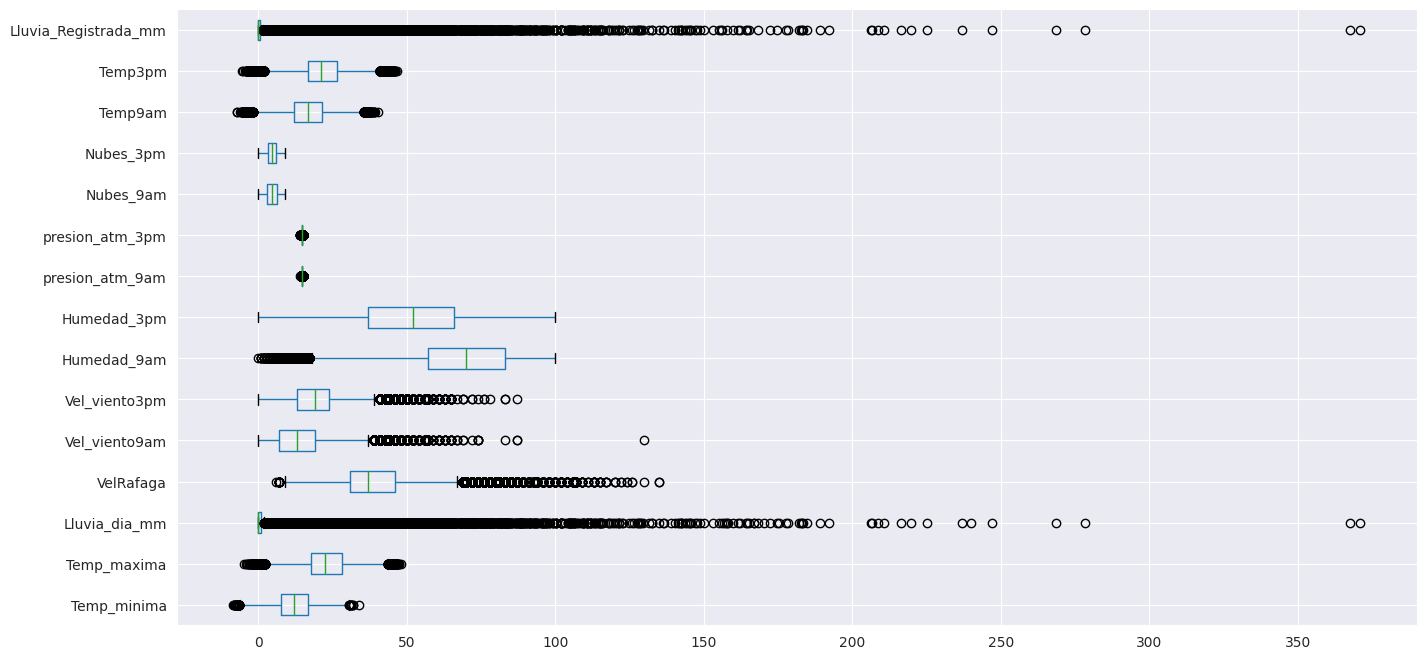

In [508]:
plt.figure(figsize=(16,8))
df.boxplot(column=['Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'VelRafaga', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am',
       'Nubes_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Registrada_mm'], vert=False)
plt.show()

**Metodo Clip para Outliers**

Se trataran solo las variables con outliers. Anteriormente se definen variables sin outliers estas son:
Columna 'Humedad_3pm' tiene 0 outliers. Porcentaje de outliers: 0.00%

Columna 'Soleado' tiene 0 outliers. Porcentaje de outliers: 0.00%

Columna 'Nubes_9am' tiene 0 outliers. Porcentaje de outliers: 0.00%

Columna 'Nubes_3pm' tiene 0 outliers. Porcentaje de outliers: 0.00

**Rango intercuartil** :  Se Identifican los outliers.  Este enfoque es especialmente útil cuando los datos no siguen una distribución normal.

Se utiliza método clip() , que no  elimina los valores atípicos (outliers), sino que los ajusta para que estén dentro del rango especificado. Donde los valores que estén por encima del límite superior serán establecidos en el valor del límite superior, y los valores que estén por debajo del límite inferior serán establecidos en el valor del límite inferior. Esto significa que los valores atípicos se ajustaran para que estén dentro del rango permitido, en lugar de eliminarlos por completo.








In [509]:
col_outliers = ['Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm',
       'VelRafaga', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am', 'presion_atm_9am', 'presion_atm_3pm', 'Temp9am', 'Temp3pm', 'Lluvia_Registrada_mm']

# Calcular el rango intercuartílico (IQR)

Q1 = df[col_outliers].quantile(0.25)
Q3 = df[col_outliers].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Aplicar el método clip utilizando los valores de lower y upper a todas las columnas en la lista 'columna'
df[col_outliers] = df[col_outliers].clip(lower=lower, upper=upper, axis=1)


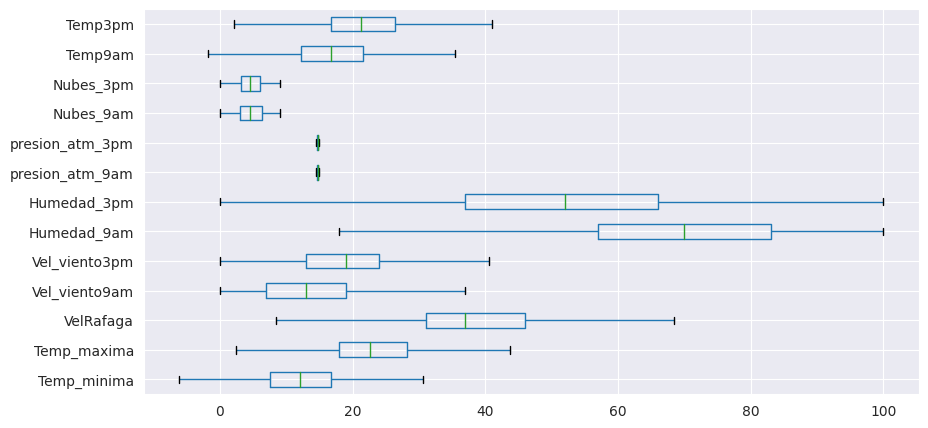

In [510]:
plt.figure(figsize=(10,5))
df.boxplot(column=['Temp_minima', 'Temp_maxima','VelRafaga', 'Vel_viento9am', 'Vel_viento3pm',
             'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm'], vert=False)
plt.show()

In [511]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in df[numeric_columns].columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

        outliers_count = outliers.sum()
        outliers_percentage = outliers.mean() * 100

        print(f"Columna '{column}' tiene {outliers_count} outliers.")
        print(f"Porcentaje de outliers: {outliers_percentage:.2f}%")
        print("---")

total_outliers = sum(outliers.sum() for column in df2.columns)
total_entries = len(df) * len(df.columns)
total_percentage = total_outliers / total_entries * 100

print(f"Porcentaje total de outliers en todo el dataset: {total_percentage:.2f}%")
print(f"Cantidad total de outliers en todo el dataset: {total_outliers}")

Columna 'Temp_minima' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Temp_maxima' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Lluvia_dia_mm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'VelRafaga' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Vel_viento9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Vel_viento3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Humedad_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Humedad_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'presion_atm_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'presion_atm_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Nubes_9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Nubes_3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Temp9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Temp3pm' tiene 0 outliers

Graficamos para visualizar los outliers . No hay outliers

<Figure size 1200x800 with 0 Axes>

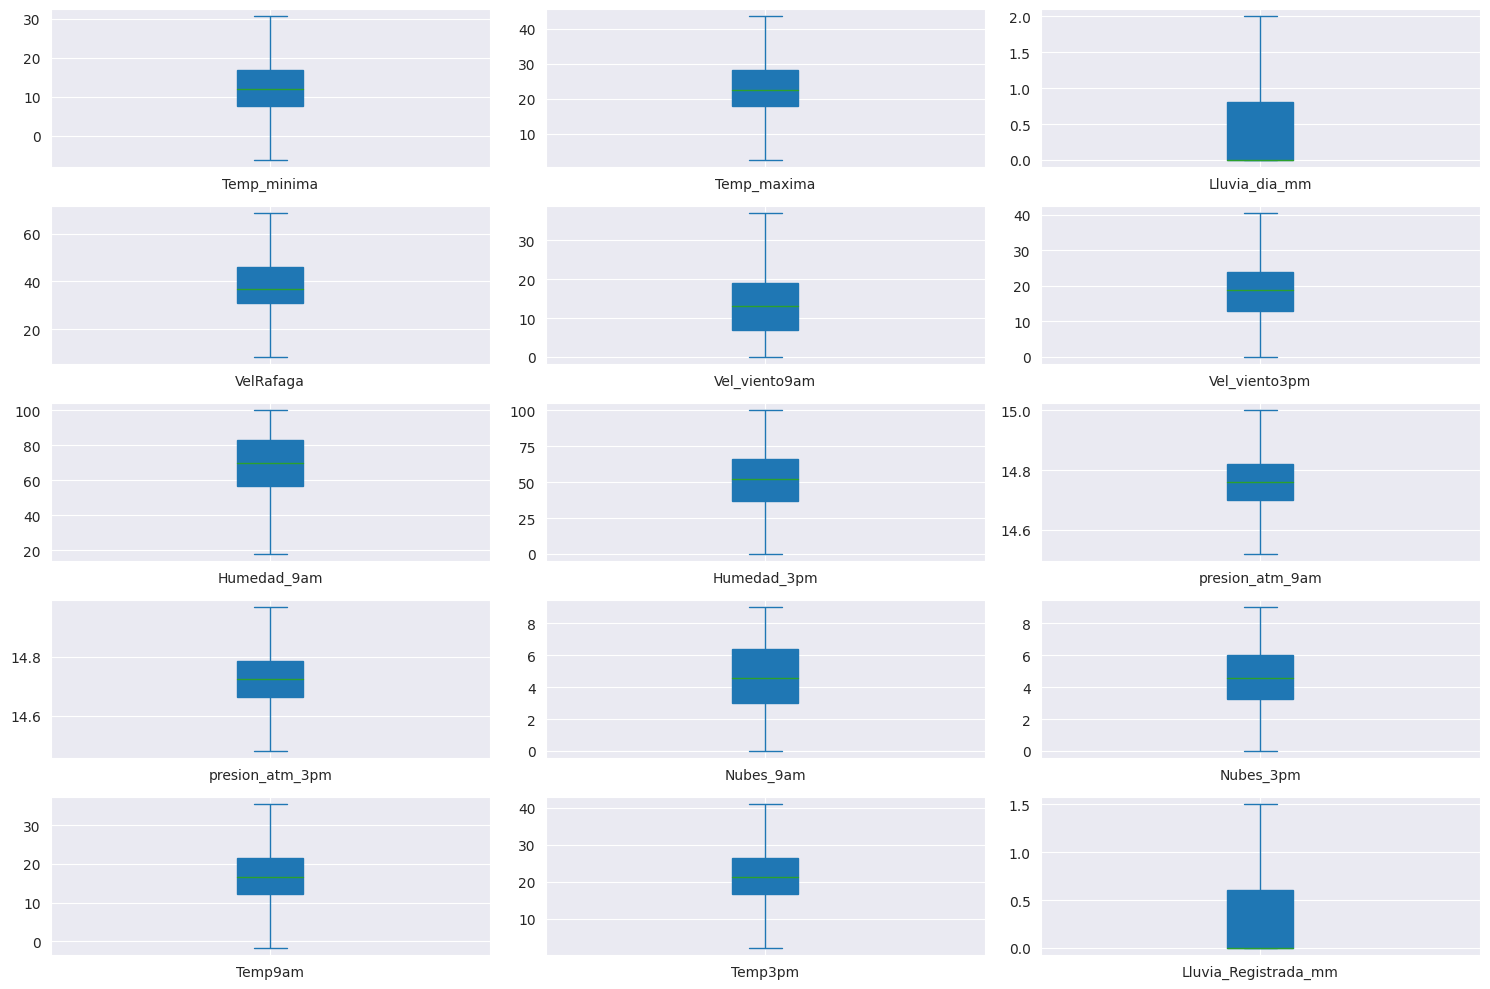

In [512]:
# Crear un gráfico de caja
numericos_columns = df.select_dtypes(include=['float64', 'float32']).columns

plt.figure(figsize=(12, 8))
df[numericos_columns].plot(kind='box', subplots=True, layout=(int(np.ceil(len(numericos_columns) / 3)), 3), figsize=(15, 10), patch_artist=True)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

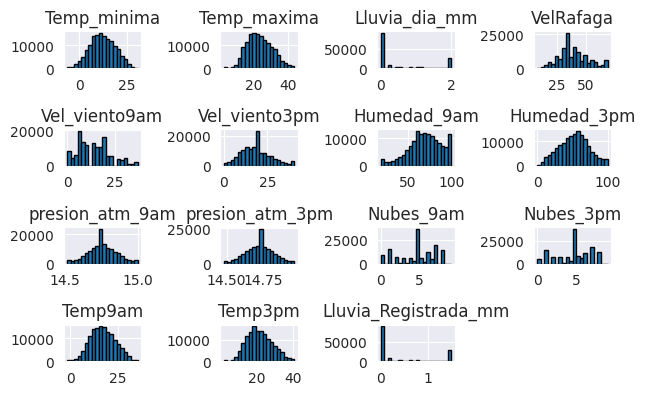

In [513]:
# Definir el tamaño de la figura y el diseño de subplots
plt.figure(figsize=(12, 8))
df.hist(bins=20, layout=(int(len(df.columns)/4), 4), edgecolor='black')
plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

###**Eliminan Variables**



Estas variables Soleado, Evaporacion ya que tenian muchos nulos , y Lluvia_mm  tiene una gran cantidad de outliers, y analizando el caso no las usaremos.

Tambien se elimina la variable Fecha y nombre_fecha que no utlizaremos en el analisis, ya que extraimos año y mes que son relevantes .

In [ ]:
df.drop('Fecha', axis=1, inplace=True)
df.drop('Día_nombre', axis=1, inplace=True)



In [314]:
df.drop('Día', axis=1, inplace=True)
df.drop('Dia_semana', axis=1, inplace=True)

Ya que se eliminaron las variables que no usaremos en el proyecto.Se sigue con el tratamiento de outliers a las otras variables del dataset.

In [315]:
df_nuevo= df.copy()


In [316]:
df=df_nuevo.copy()

In [317]:
df_regresion=df.copy()

###**Transformacion Variables Categoricas**

Para manejar y transformar variables categóricas, existen varias técnicas dependiendo del tipo de análisis y modelo a utilizar.

In [319]:
# Seleccionar solo las columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Iterar sobre las columnas categóricas y mostrar sus valores únicos
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Columna '{column}' tiene los siguientes valores únicos: {unique_values}")
    print("---")


Columna 'Localidad' tiene los siguientes valores únicos: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
---
Columna 'DirRafaga' tiene los siguientes valores únicos: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
---
Columna 'Dir_viento9am' tiene los siguientes valores únicos: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
---
Columna 'Dir_viento3pm' tiene los siguientes valores único

###**ONE -HOT ENCODING**

Se realiza en las variables loacalidad, DirRafaga,Dir_viento3pm,Dir_viento9am

Para transformar variables categóricas en un dataset, utilizamos la codificación one-hot. Esto implica crear nuevas columnas binarias para cada categoría única presente en la columna original. Cada nueva columna representa la presencia o ausencia de esa categoría en cada fila de datos. Es una técnica crucial para los  modelos que requieren datos numéricos en lugar de categóricos. Utilizamos .get_dummies() de pandas para realizar esta codificación de manera simple y efectiva, asegurando que el modelo capture adecuadamente la información de todas las categorías sin sesgos indebidos.

También es versátil y se adapta bien a diferentes tipos de modelos de aprendizaje automático, incluidos árboles de decisión, regresión lineal y algoritmos de clasificación basados en SVM.

###**Variable Localidad**


In [517]:
# Crear un diccionario con la asignación de números a cada ciudad
city_mapping = {
    'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4,
    'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9,
    'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13,
    'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17,
    'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22,
    'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27,
    'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32,
    'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37,
    'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42,
    'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47,
    'Uluru': 48
}

# Aplicar el mapeo a la columna 'Location'
df['Localidad'] = df['Localidad'].replace(city_mapping)

In [518]:
df.shape

(140787, 21)

###**Variable DirRafaga,Dir_viento3pm,Dir_viento9am**

Cada una de estas clases representa una dirección específica de donde proviene el viento en el momento en que se tomó la medición. La dirección del viento es crucial en las condiciones  meteorológicas y climáticas, ya que influye en el clima local y las condiciones atmosféricas.

In [519]:
# Obtener los valores únicos en 'DirRafaga'
unique_dir_rafaga = df['DirRafaga'].unique()
print("Valores únicos en 'DirRafaga':", unique_dir_rafaga)

# Obtener los valores únicos en 'Dir_viento3pm'
unique_dir_viento3pm = df['Dir_viento3pm'].unique()
print("Valores únicos en 'Dir_viento3pm':", unique_dir_viento3pm)

# Obtener los valores únicos en 'Dir_viento9am'
unique_dir_viento9am = df['Dir_viento9am'].unique()
print("Valores únicos en 'Dir_viento9am':", unique_dir_viento9am)


Valores únicos en 'DirRafaga': ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Valores únicos en 'Dir_viento3pm': ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
Valores únicos en 'Dir_viento9am': ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


W: Oeste

WNW: Oeste Noroeste

WSW: Oeste Suroeste

NE: Noreste

NNW: Noroeste Noroeste

N: Norte

NNE: Noreste Noreste

SW: Suroeste

ENE: Este Noreste

SSE: Suroeste Suroeste

S: Sur

NW: Noroeste

SE: Sureste

ESE: Este Sureste

E: Este

SSW: Suroeste Suroeste


In [520]:
# Obtener los valores únicos en 'WindGustDir'
unique_values = df['DirRafaga'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindGustDir'
df['DirRafaga'] = df['DirRafaga'].replace(mapping)


In [521]:
# Obtener los valores únicos en 'WindDir3pm'
unique_values = df['Dir_viento9am'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir3pm'
df['Dir_viento9am'] = df['Dir_viento9am'].replace(mapping)

In [522]:
# Obtener los valores únicos en 'WindDir3pm'
unique_values = df['Dir_viento3pm'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir3pm'
df['Dir_viento3pm'] = df['Dir_viento3pm'].replace(mapping)

In [523]:
df.shape

(140787, 21)

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Localidad             140787 non-null  int64  
 1   Temp_minima           140787 non-null  float64
 2   Temp_maxima           140787 non-null  float64
 3   Lluvia_dia_mm         140787 non-null  float64
 4   DirRafaga             140787 non-null  int64  
 5   VelRafaga             140787 non-null  float64
 6   Dir_viento9am         140787 non-null  int64  
 7   Dir_viento3pm         140787 non-null  int64  
 8   Vel_viento9am         140787 non-null  float64
 9   Vel_viento3pm         140787 non-null  float64
 10  Humedad_9am           140787 non-null  float64
 11  Humedad_3pm           140787 non-null  float64
 12  presion_atm_9am       140787 non-null  float64
 13  presion_atm_3pm       140787 non-null  float64
 14  Nubes_9am             140787 non-null  float64
 15  Nubes

###**Eliminan Variable**

In [332]:
df.drop([ 'Año', 'Mes'],axis=1, inplace=True)

In [340]:
df.drop([ 'Evaporacion', 'Soleado'],axis=1, inplace=True)

###**Transformacion variables objetivo**

En el caso de variables binarias como "Lluvia_Mañana" y "Lluvia mañana", ambos métodos map , ya que solo hay dos valores posibles (0 y 1).

In [525]:
df["Lluvia_Hoy"] = df["Lluvia_Hoy"].map({ "No":0, "Yes":1 })
df["Lluvia_Mañana"] = df["Lluvia_Mañana"].map({ "No":0, "Yes":1 })

In [336]:
df[['Lluvia_Mañana', 'Lluvia_Hoy']].sample(5)


,Lluvia_Mañana,Lluvia_Hoy
97855,0,0
24895,0,0
120729,0,0
122809,1,0
126658,0,0


###**Estandarización (StandardScaler)**



Las variables tienden a una distribución normal o aproximadamente normal.

Modelos Sensibles a la Distribución como  Regresión Lineal, K-Means y PCA son sensibles a la escala y a la distribución de los datos.

Media 0 y Desviación Estándar 1: Este método ajusta los datos para que tengan una media de 0 y una desviación estándar de 1, lo que puede ayudar a que los modelos converjan más rápido.

In [342]:
df.columns

Index(['Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm', 'DirRafaga',
       'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm', 'Vel_viento9am',
       'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
       'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm', 'Lluvia_Mañana'],
      dtype='object')

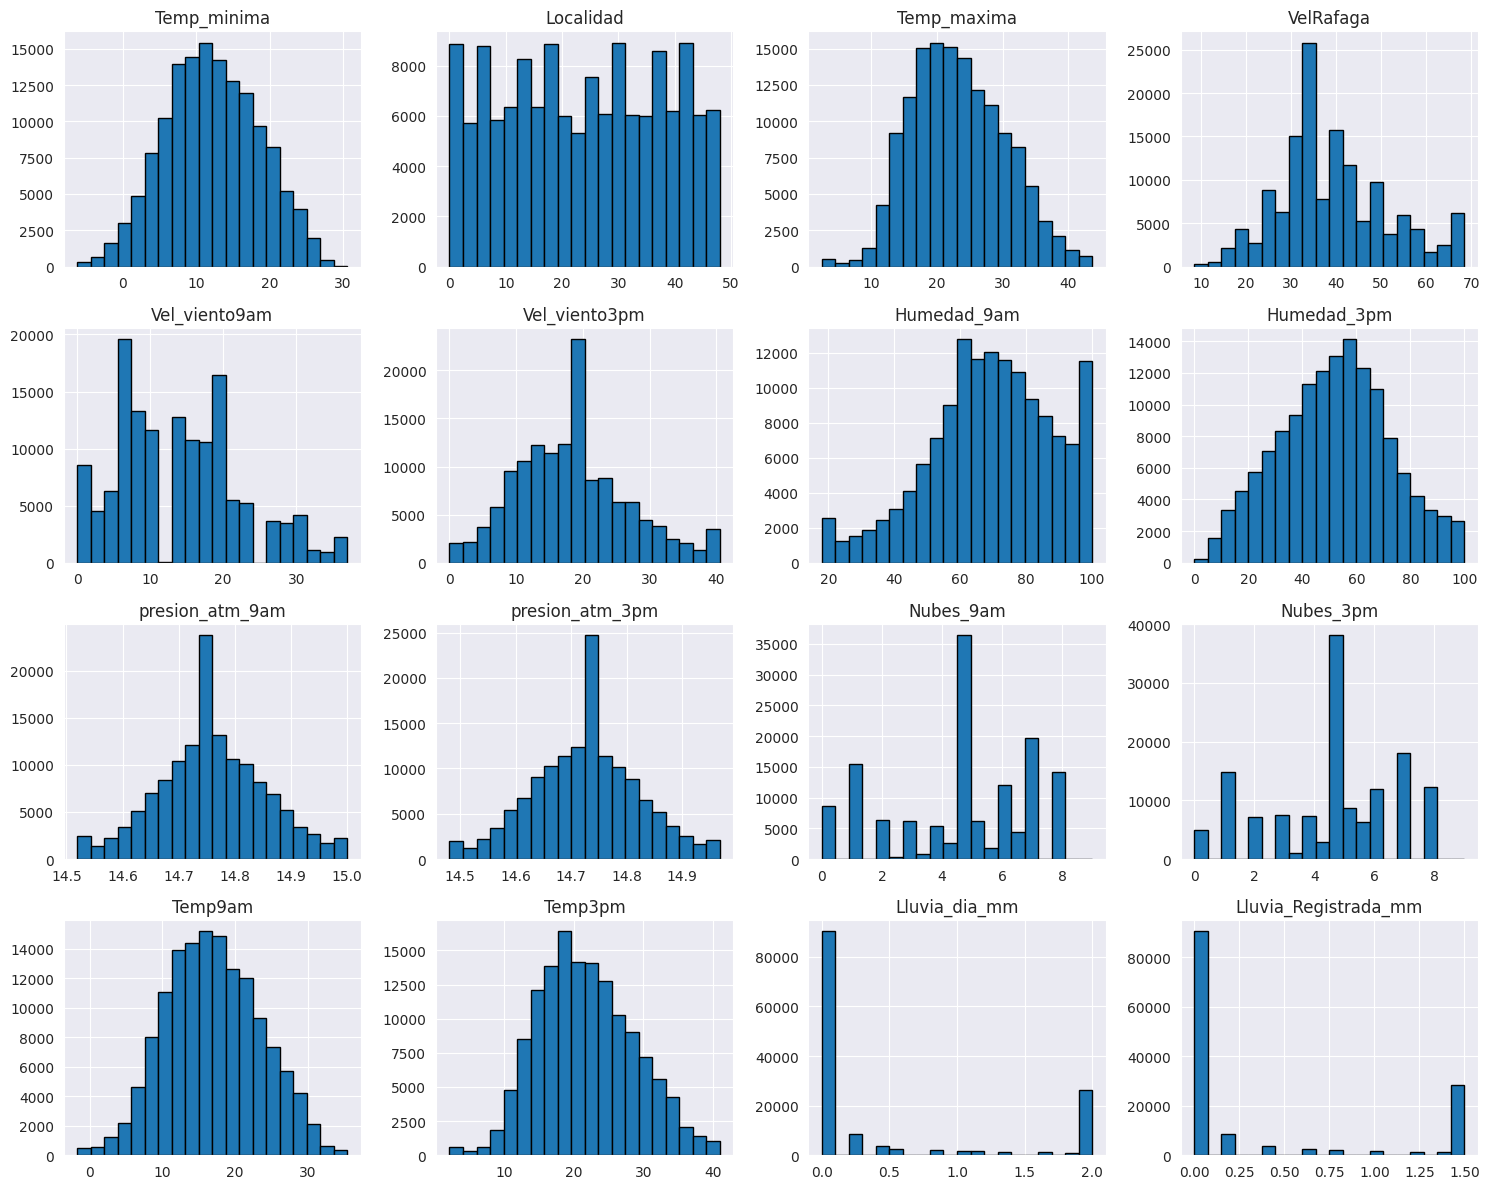

In [354]:
import matplotlib.pyplot as plt

# Definir las columnas específicas a graficar
numeric_columns = ['Temp_minima','Localidad' ,'Temp_maxima', 'VelRafaga', 'Vel_viento9am',
                   'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
                   'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm','Lluvia_dia_mm',
        'Lluvia_Registrada_mm']

# Crear un gráfico de caja para cada columna numérica

# Calcular el número de subplots necesarios
num_plots = len(numeric_columns)

# Definir el tamaño de la figura y el diseño de subplots adecuado
cols_per_subplot = 4
rows = (num_plots - 1) // cols_per_subplot + 1  # Calcular el número de filas necesario

# Crear la figura y los subplots
plt.figure(figsize=(15, rows * 3))
for i, col in enumerate(numeric_columns):
    plt.subplot(rows, cols_per_subplot, i + 1)
    df[col].hist(bins=20, edgecolor='black')
    plt.title(col)
    plt.tight_layout()

plt.show()


Columnas con distribución normal para estandarizar:

Temp_minima
Temp_maxima
Vel_viento3pm
Humedad_9am
Humedad_3pm
presion_atm_9am
presion_atm_3pm
Temp9am
Temp3pm

Columnas con distribución no normal para escalar:

VelRafaga
Vel_viento9am
Nubes_9am
Nubes_3pm

Normalizaremos las características para que las características que tienen no tiene una distribucion normal.<br>

Al observar las formas de la distribución de cada característica, normalizaremos las características , aquellas que no tengan una forma de campana.<br>


In [526]:
df.columns

Index(['Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm', 'DirRafaga',
       'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm', 'Vel_viento9am',
       'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
       'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm', 'Lluvia_Mañana'],
      dtype='object')

In [527]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar
columns_to_normalize = ['Localidad', 'Temp_minima', 'Temp_maxima', 'Lluvia_dia_mm', 'DirRafaga',
       'VelRafaga', 'Dir_viento9am', 'Dir_viento3pm', 'Vel_viento9am',
       'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm', 'presion_atm_9am',
       'presion_atm_3pm', 'Nubes_9am', 'Nubes_3pm', 'Temp9am', 'Temp3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm']

# Inicializar el scaler
scaler = MinMaxScaler()

# Normalizar los datos
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Ver los primeros registros del DataFrame
df.head()

,Localidad,Temp_minima,Temp_maxima,Lluvia_dia_mm,DirRafaga,VelRafaga,Dir_viento9am,Dir_viento3pm,Vel_viento9am,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Nubes_9am,Nubes_3pm,Temp9am,Temp3pm,Lluvia_Hoy,Lluvia_Registrada_mm,Lluvia_Mañana
0,0.0,0.532609,0.496359,0.3,0.000000,0.591667,0.000000,0.000000,0.540541,0.592593,0.646341,0.22,0.200301,0.258929,0.888889,0.602199,0.501344,0.506443,0.0,0.000000,0
1,0.0,0.369565,0.549757,0.0,0.066667,0.591667,0.066667,0.066667,0.108108,0.543210,0.317073,0.25,0.287651,0.279762,0.710262,0.602199,0.509409,0.570876,0.0,0.000000,0
2,0.0,0.519022,0.564320,0.0,0.133333,0.625000,0.000000,0.066667,0.513514,0.641975,0.243902,0.30,0.197289,0.306548,0.710262,0.222222,0.611559,0.542526,0.0,0.000000,0
3,0.0,0.418478,0.620146,0.0,0.200000,0.258333,0.133333,0.133333,0.297297,0.222222,0.329268,0.16,0.498494,0.428571,0.710262,0.602199,0.533602,0.627577,0.0,0.666667,0
4,0.0,0.644022,0.724515,0.5,0.000000,0.541667,0.200000,0.200000,0.189189,0.493827,0.780488,0.33,0.293675,0.226190,0.777778,0.888889,0.525538,0.710052,0.0,0.133333,0


In [528]:
df.shape

(140787, 21)

##**Variable Objetivo : 'Lluvia_Mañana'**

In [364]:
df2['Lluvia_Mañana'].value_counts()

Lluvia_Mañana
0    109586
1     31201
Name: count, dtype: int64

Revisa la distribución de las observaciones respecto de la variable que se usará
para la clasificación

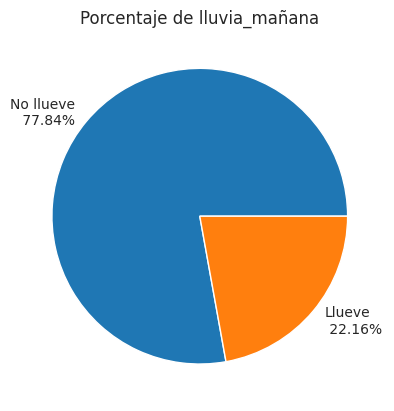

In [365]:
# Gráfico de tortas del porcentaje de muestras llueve y no llueve

clases = np.array([df2[df2.Lluvia_Mañana == 0.0].shape[0],df2[df2.Lluvia_Mañana == 1.0].shape[0]])
# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No llueve\n ' + labels[0]
labels[1] = 'Llueve\n ' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de lluvia_mañana')
plt.show()

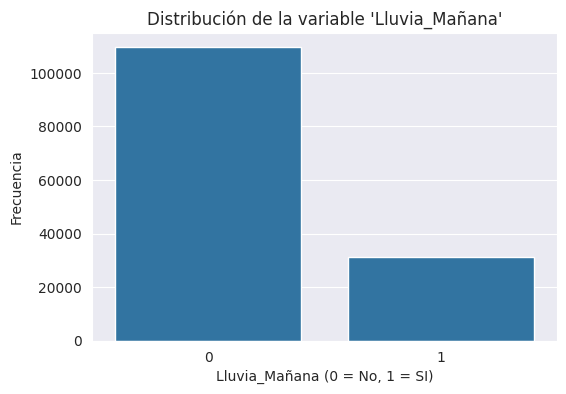

In [366]:
# Visualizar el balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Lluvia_Mañana', data=df2)
plt.title("Distribución de la variable 'Lluvia_Mañana'")
plt.xlabel("Lluvia_Mañana (0 = No, 1 = SI)")
plt.ylabel("Frecuencia")
plt.show()

La variable Lluvia_mañana está desbalanceada, con 109.586 instancias de la clase 0 (No) y 31.201 instancias de la clase 1 (Sí). Esto afecta el rendimiento de los modelos de aprendizaje automático, especialmente si la clase minoritaria (lluvia yes) es la que te interesa predecir con mayor precisión.

##**Data frame de cada Modelo (df original)**

In [367]:
df2.columns

Index(['Temp_minima', 'Temp_maxima', 'Vel_viento3pm', 'Humedad_9am',
       'Humedad_3pm', 'presion_atm_9am', 'presion_atm_3pm', 'Temp9am',
       'Temp3pm', 'VelRafaga', 'Vel_viento9am', 'Nubes_9am', 'Nubes_3pm',
       'Localidad', 'Lluvia_dia_mm', 'Lluvia_Registrada_mm', 'DirRafaga',
       'Dir_viento9am', 'Dir_viento3pm', 'Lluvia_Hoy', 'Lluvia_Mañana'],
      dtype='object')

In [368]:

columnas_regresion = [
    'Temp_minima', 'Temp_maxima', 'Vel_viento3pm', 'Humedad_9am', 'Humedad_3pm',
    'presion_atm_9am', 'presion_atm_3pm', 'Temp9am', 'Temp3pm', 'VelRafaga',
    'Vel_viento9am', 'Nubes_9am', 'Nubes_3pm', 'Lluvia_dia_mm', 'Lluvia_Registrada_mm',
    'Localidad', 'DirRafaga', 'Dir_viento9am', 'Dir_viento3pm',
]

# Crear el nuevo DataFrame con las columnas especificadas
df_regresion = df2[columnas_regresion]

# Mostrar las primeras filas para verificar
df_regresion.head()

# Verificar el número de columnas
print("Número de columnas en df_regresion:", df_regresion.shape[1])


Número de columnas en df_regresion: 19


In [369]:
df_regresion.head()

,Temp_minima,Temp_maxima,Vel_viento3pm,Humedad_9am,Humedad_3pm,presion_atm_9am,presion_atm_3pm,Temp9am,Temp3pm,VelRafaga,Vel_viento9am,Nubes_9am,Nubes_3pm,Lluvia_dia_mm,Lluvia_Registrada_mm,Localidad,DirRafaga,Dir_viento9am,Dir_viento3pm
0,0.189490,-0.047787,0.649428,0.110036,-1.432724,-1.512253,-1.245038,-0.010364,0.010709,0.591667,0.540541,0.888889,0.602199,0.3,0.000000,0.0,0.000000,0.000000,0.000000
1,-0.748711,0.262380,0.413306,-1.323919,-1.287262,-1.072230,-1.138283,0.035844,0.372332,0.591667,0.108108,0.710262,0.602199,0.0,0.000000,0.0,0.066667,0.066667,0.066667
2,0.111307,0.346972,0.885551,-1.642576,-1.044825,-1.527426,-1.001026,0.621137,0.213218,0.625000,0.513514,0.710262,0.222222,0.0,0.000000,0.0,0.133333,0.000000,0.066667
3,-0.467251,0.671238,-1.121493,-1.270810,-1.723649,-0.010105,-0.375746,0.174466,0.690560,0.258333,0.297297,0.710262,0.602199,0.0,0.666667,0.0,0.200000,0.133333,0.133333
4,0.830595,1.277475,0.177183,0.694240,-0.899363,-1.041883,-1.412796,0.128258,1.153437,0.541667,0.189189,0.777778,0.888889,0.5,0.133333,0.0,0.000000,0.200000,0.200000


In [207]:
df_regresion=df2.copy()

In [208]:
df_arbol =df2.copy()

In [209]:
df_kmeans=df2.copy()

In [210]:
df_naives =df2.copy()


In [158]:
df_x=df2.copy()

In [164]:
df2.shape

(140787, 67)

##**Usando Selector de columnas**

Se utiliza una clase de Sklearn llamada: SelecKBest , para seleccionar las 5 caracteristicas mejores.

In [531]:

from sklearn.feature_selection import SelectKBest, f_classif
X= df.drop(['Lluvia_Mañana'], axis=1)
y= df['Lluvia_Mañana']

# Seleccionar las mejores características usando ANOVA F-test
best = SelectKBest(score_func=f_classif, k=7)  # Seleccionar las 7 mejores características
X_new = best.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_features = X.columns[best.get_support(indices=True)]
print("Caracteristicas Seleccionadas:", selected_features)

Caracteristicas Seleccionadas: Index(['Lluvia_dia_mm', 'Humedad_9am', 'Humedad_3pm', 'Nubes_9am', 'Nubes_3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm'],
      dtype='object')


In [532]:
# Crear un nuevo DataFrame con las características seleccionadas y la variable objetivo
df_selec = pd.DataFrame(X[selected_features])
df_selec['Lluvia_Mañana'] = y

In [533]:
df_selec.shape


(140787, 8)

In [535]:
df_selec.columns

Index(['Lluvia_dia_mm', 'Humedad_9am', 'Humedad_3pm', 'Nubes_9am', 'Nubes_3pm',
       'Lluvia_Hoy', 'Lluvia_Registrada_mm', 'Lluvia_Mañana'],
      dtype='object')

##**Preparacion de los datos**

In [211]:
X = df2.drop('Lluvia_Mañana', axis=1)
y = df2['Lluvia_Mañana']

Se separa el datset en datos de Train80 % y Test 20%,que son los estandares de la industria.

In [212]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112629, 63)
y_train shape: (112629,)
X_test shape: (28158, 63)
y_test shape: (28158,)


#MODELADO

#**Modelo de regresion Lineal**

Target =lluvia registrada_mm

 El modelo va a predecir  la cantidad de lluvia registrada en mm basandonos en un conjunto de variables predictoras seleccionadas. Esto es crucial para entender y planificar eventos relacionados con el clima, como la gestión de recursos hídricos, la agricultura, o incluso la planificación urbana.

 Predecir la cantidad de lluvia registrada ('Lluvia_Registrada_mm') basado en las variables climáticas.

Se utilizó el modelo de regresión lineal de sklearn para entrenar y predecir sobre los datos.

In [370]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [371]:
# Dividir datos en variables predictoras (X) y target (y)
X = df_regresion.drop('Lluvia_Registrada_mm', axis=1)  # Variables predictoras
y = df_regresion['Lluvia_Registrada_mm']  # Variable target




**División de los Datos:**
Los datos se dividieron en conjunto de entrenamiento y prueba con una proporción del 80% para entrenamiento y 20% para prueba.



In [372]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 140787
Total # of sample in train dataset: 112629
Total # of sample in test dataset: 28158


**Inicializar el modelo de regresión lineal y se Entrena el Modleo con los datos de entrenamiento**

In [373]:

model_lr = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [375]:
# Imprimimos los coeficientes y el intercepto
print(model_lr.intercept_)
print(model_lr.coef_)

-0.14008351231685795
[-0.00576243  0.02770257 -0.04473712 -0.00634913  0.17667482  0.12304198
 -0.17763602 -0.01248596 -0.01454808  0.49693111 -0.01783564  0.02412727
  0.17704513  0.16756736  0.02194822 -0.01843637  0.02461258 -0.01827608]


**Predecir sobre el conjunto de prueba, Hacemos predicciones con el conjunto de datos de test**

In [376]:

y_pred_regresion = model_lr.predict(X_test)


##**Evaluacion del modelo**

**Calcular métricas de evaluación**


In [377]:
mse = mean_squared_error(y_test, y_pred_regresion)
r2 = r2_score(y_test, y_pred_regresion)

**Imprimir métricas**


In [378]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.10460118570584138
R-squared (R²): 0.369770118903493


In [379]:
print("R squared of the Linear Regression on training set: {:.2%}".format(model_lr.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(model_lr.score(X_test, y_test)))

R squared of the Linear Regression on training set: 36.99%
R squared of the Linear Regression on test set: 36.98%


El R cuadrado indica que el modelo explica aproximadamente el 35.21% de la varianza en los datos de entrenamiento y el 35,07% en los datos de prueba. Esto sugiere que el modelo tiene una capacidad limitada para explicar la variabilidad de la variable objetivo.

**Graficar valores reales vs predicciones**


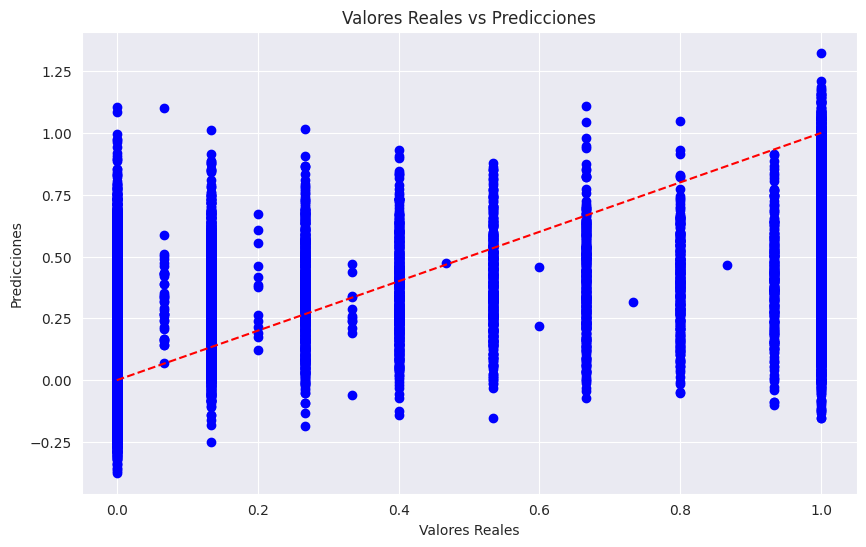

In [380]:
# Graficar valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_regresion, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [381]:
 #Coeficientes del modelo
coefficients_lr = model_lr.coef_
intercept_lr = model_lr.intercept_

print("Coeficientes del modelo de regresión lineal:")
print(coefficients_lr)
print("Término independiente:")
print(intercept_lr)

Coeficientes del modelo de regresión lineal:
[-0.00576243  0.02770257 -0.04473712 -0.00634913  0.17667482  0.12304198
 -0.17763602 -0.01248596 -0.01454808  0.49693111 -0.01783564  0.02412727
  0.17704513  0.16756736  0.02194822 -0.01843637  0.02461258 -0.01827608]
Término independiente:
-0.14008351231685795


------------------------------------------------------------------------------------------------------------------------------------------------------------------------

array([ 0.18701196,  0.25453915, -0.15742941, ..., -0.07323495,
        0.36926594,  0.01280957])

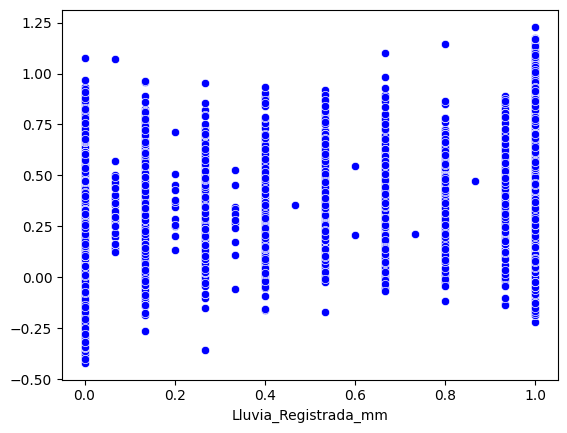

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred = model_lr.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")

y_pred




In [ ]:
# Calcular métricas de evaluación
#MSE
mse = mean_squared_error(y_test, y_pred)
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.10776388206532805
R-squared (R²): 0.35071463939689385


MSE: Con un MSE de 0.1067 , podemos decir que el modelo, en promedio, se equivoca en 0.1067  unidades al predecir los valores .Un MSE de 0.1067 sugiere que las predicciones del modelo tienden a estar relativamente cerca de los valores reales de lluvia registrada, en términos de error cuadrático medio.

R²: Un R² de 0.3574 indica que el modelo explica moderadamente bien la variabilidad en la cantidad de lluvia registrada. Esto significa que las variables predictoras incluidas en el modelo contribuyen a explicar aproximadamente el 35.74% de las variaciones observadas en la cantidad de lluvia registrada.

###**Fase 5 Evaluacion del modelo**

true (real): Representa el valor verdadero del target Lluvia_Registrada_mm en el conjunto de prueba.
predicted (predicción): Es el valor predicho por el modelo de regresión lineal para Lluvia_Registrada_mm basado en las características (variables predictoras) del conjunto de prueba.
diff (diferencia): Calcula la diferencia entre la predicción y el valor real. Un valor positivo indica que el modelo predijo más de lo que realmente ocurrió, mientras que un valor negativo indica que el modelo predijo menos de lo que realmente ocurrió.

In [383]:
# Evaluando el Modelo de Regresión Lineal
#
d = {"true": y_test, "predicted": y_pred_regresion}
df_lr = pd.DataFrame(data=d)
df_lr["diff"] = df_lr["predicted"]-df_lr["true"]
df_lr


Output hidden; open in https://colab.research.google.com to view.

In [385]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error of the Linear Regression on test set is {:.2f}".format(mean_absolute_error(y_test, y_pred_regresion)))

Mean Absolute Error of the Linear Regression on test set is 0.25


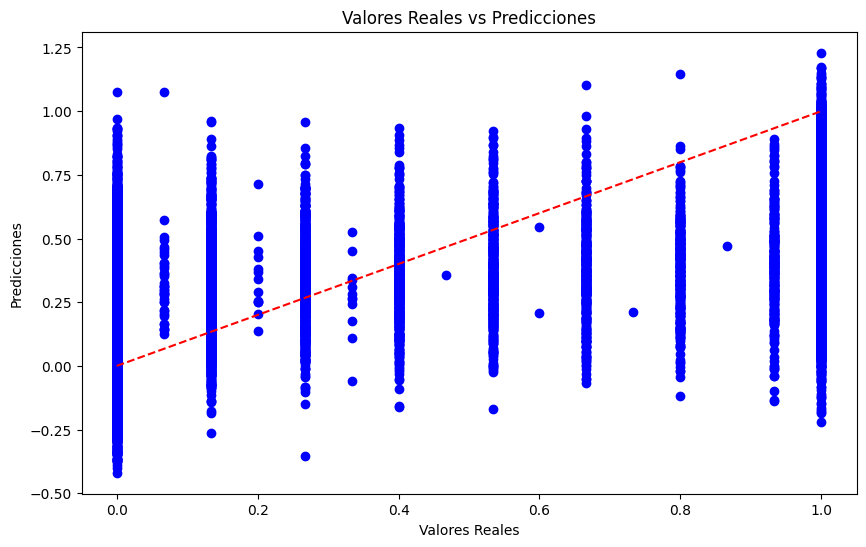

In [ ]:
# Plot de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()


In [387]:
# Añadir las predicciones al DataFrame original
df_results = X_test.copy()
df_results['Lluvia_Registrada_mm_Pred'] = y_pred_regresion
df_results['Lluvia_Registrada_mm_Real'] = y_test.values

# Guardar los resultados en un archivo CSV
df_results.to_csv('resultados_regresion.csv', index=False)


In [ ]:
from joblib import dump

# Suponiendo que ya tienes entrenado tu modelo de regresión (modelo_regresion)
# Guardar el modelo en un archivo .pkl
dump(model_lr, 'modelo_regresion.pkl')


['modelo_regresion.pkl']

In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde guardar el archivo en Drive
file_path = '/content/drive/My Drive/resultados_regresion.csv'

# Guardar los resultados en un archivo CSV en Drive
df_results.to_csv(file_path, index=False)


Mounted at /content/drive


#**Arbol de decision**





Clasificar si va a llover mañana ('Lluvia_Mañana') basado en las variables climáticas.

##**Preparacion de los datos**


In [536]:
# Selecciona las variables
X = df_selec.drop(["Lluvia_Mañana"],axis=1)
# Rescata la etiqueta
y = df_selec.Lluvia_Mañana

In [537]:
LABELS = ['no llueve', 'si llueve']

In [542]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero Lluvia_Mañana')
    plt.xlabel('Predicted Lluvia_Mañana')
    plt.show()
    print (classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21897
           1       1.00      1.00      1.00      6261

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158



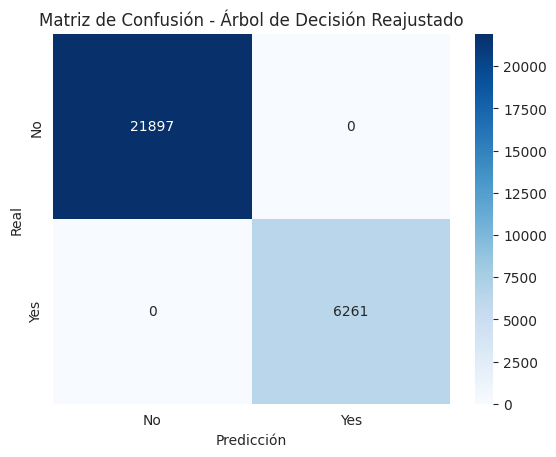

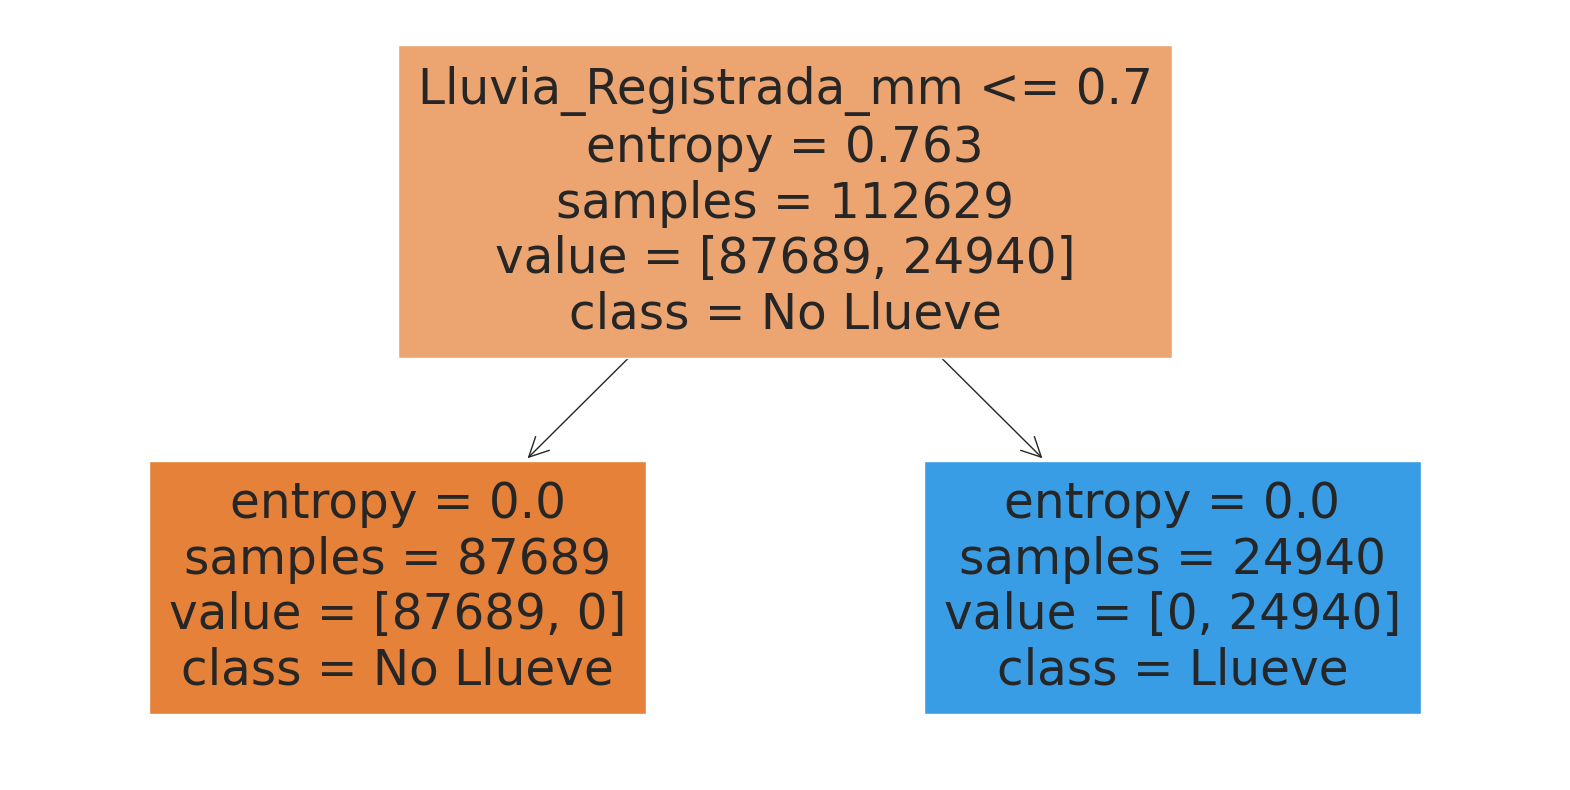

In [543]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Paso 2: Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar el modelo
#model = DecisionTreeClassifier(random_state=42)
#model.fit(X_train, y_train)

model_arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model_arbol.fit(X_train, y_train)

# Paso 4: Evaluar el modelo
y_pred_arbol = model_arbol.predict(X_test)
print(classification_report(y_test, y_pred_arbol))

# Visualizar la matriz de confusión

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_arbol)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión Reajustado')
plt.show()

# Paso 5: Visualizar el Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model_arbol, filled=True, feature_names=X.columns, class_names=['No Llueve', 'Llueve'])
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21897
           1       1.00      1.00      1.00      6261

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158



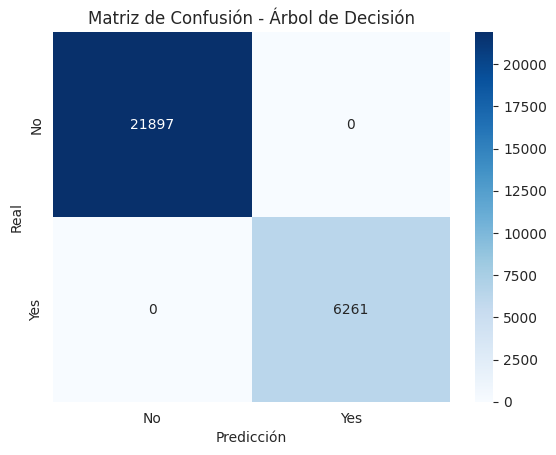

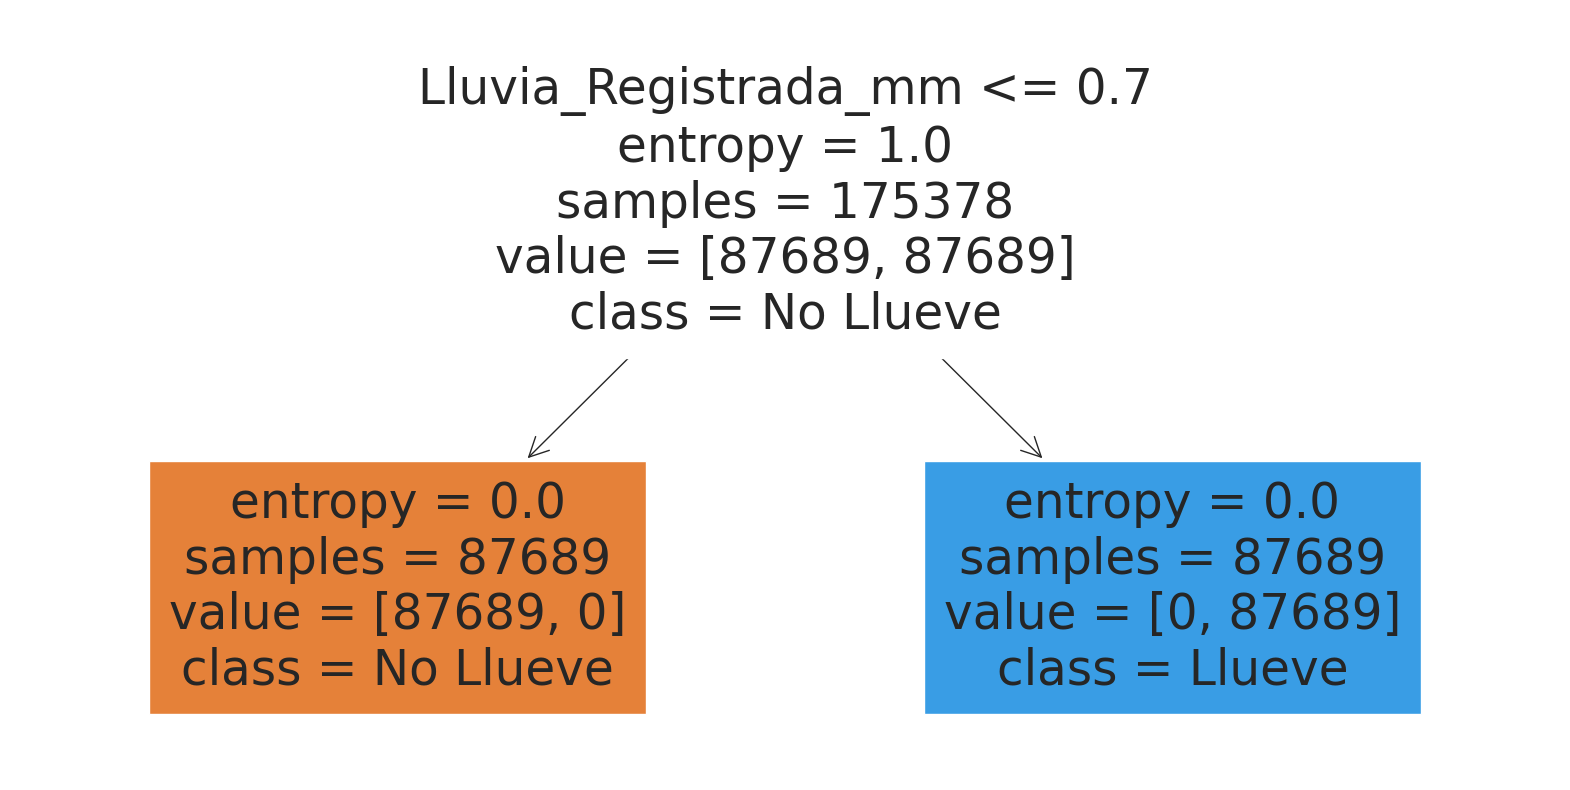

In [541]:
# Importar las bibliotecas necesarias
from sklearn.tree import plot_tree

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Aplicar SMOTE para balancear los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Paso 4: Crear el modelo de árbol de decisión
model_arbol = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Paso 5: Entrenar el modelo con los datos balanceados de entrenamiento
model_arbol.fit(X_train_balanced, y_train_balanced)

# Paso 6: Hacer predicciones en los datos de prueba
y_pred_arbol = model_arbol.predict(X_test)

# Paso 7: Evaluar el modelo
print(classification_report(y_test, y_pred_arbol))

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_arbol)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model_arbol, filled=True, feature_names=X.columns, class_names=['No Llueve', 'Llueve'])
plt.show()


Precisión (Precision):

Clase 0: 0.87

Clase 1: 0.58

La precisión indica la proporción de verdaderos positivos entre los ejemplos que el modelo ha clasificado como positivos. En este caso, la precisión para la clase 0 (no lluvia) es bastante alta (87%), lo que significa que la mayoría de las predicciones de no lluvia son correctas. Sin embargo, la precisión para la clase 1 (lluvia) es baja (58%), lo que indica que una cantidad significativa de las predicciones de lluvia son incorrectas.

Sensibilidad o Recall (Recall):

Clase 0: 0.89

Clase 1: 0.54

El recall indica la proporción de verdaderos positivos entre los ejemplos que realmente son positivos. La clase 0 tiene un recall alto (89%), lo que significa que la mayoría de los días sin lluvia se identifican correctamente. Por otro lado, el recall para la clase 1 es bajo (54%), lo que significa que el modelo no está capturando adecuadamente muchos de los días con lluvia.


F1-Score:

Clase 0: 0.88

Clase 1: 0.56

El F1-score es la media  entre precisión y recall. Para la clase 0, el F1-score es alto (88%), indicando un buen balance entre precisión y recall. Para la clase 1, el F1-score es bajo (56%), reflejando que tanto la precisión como el recall son bajos para esta clase.

Exactitud (Accuracy): 0.81

La exactitud es la proporción de predicciones correctas sobre el total de predicciones. Un 81% de exactitud indica que el modelo está haciendo un buen trabajo en general, pero dado el desequilibrio de clases, esta métrica puede ser engañosa.

El **modelo de árbol de decisión** es capaz de predecir con bastante precisión si lloverá o no en función de las características proporcionadas. Se puede  mejorar, especialmente en la identificación de los casos en los que realmente llueve (clase 1), donde el modelo podría beneficiarse de un mayor recall para garantizar que no se pasen por alto estos casos importantes.

In [ ]:
# Opcional: Validación cruzada para evaluar la generalización del modelo
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_arbol, X_train_balanced, y_train_balanced, cv=5)
print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")

Accuracy: 0.7472089958901582 (+/- 0.029164902884881043)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Suponiendo que decision_tree_model es tu modelo de árbol de decisión ya entrenado
model_arbol = DecisionTreeClassifier()
model_arbol.fit(X_train, y_train)  # Asegúrate de haber entrenado tu modelo antes

# Guardar el modelo en un archivo
filename = 'modelo_arbol_decision.pkl'
joblib.dump(model_arbol, filename)


['modelo_arbol_decision.pkl']

In [ ]:
# Añadir las predicciones al DataFrame original
df_results_arbol = X_test.copy()
df_results_arbol['Prediccion_DT'] = y_pred_arbol
df_results_arbol['Lluvia_Registrada_mm_Real'] = y_test.values

# Guardar los resultados en un archivo CSV
df_results_arbol.to_csv('resultados_arbol_decision.csv', index=False)


##**Naives Bayes**

**NAIVES BAYES**

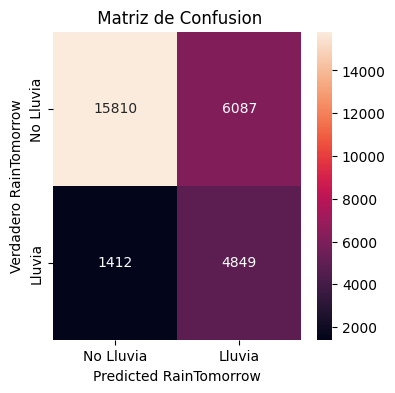

              precision    recall  f1-score   support

           0       0.92      0.72      0.81     21897
           1       0.44      0.77      0.56      6261

    accuracy                           0.73     28158
   macro avg       0.68      0.75      0.69     28158
weighted avg       0.81      0.73      0.75     28158

Precisión del modelo: 0.4433979517190929


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Suponiendo que ya tienes cargado tu DataFrame df_arbol con las variables necesarias
# Definir X e y
X = df_arbol.drop(columns=['Lluvia_Mañana'])  # Features
y = df_arbol['Lluvia_Mañana']  # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Crear el clasificador Naive Bayes
naive_bayes = GaussianNB()

# Entrenar el clasificador con los datos balanceados
naive_bayes.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba
y_pred_nb = naive_bayes.predict(X_test)

# Definir etiquetas para la matriz de confusión
LABELS = ['No Lluvia', 'Lluvia']


# Evaluación del modelo
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(4, 4))
sns.heatmap(matriz, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title(" Matriz de Confusion")
plt.ylabel('Verdadero RainTomorrow')
plt.xlabel('Predicted RainTomorrow')
plt.show()
print (classification_report(y_test, y_pred_nb))

#print('Matriz de Confusión:')
#print(matriz)
# Se calcula la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_nb)
print('Precisión del modelo:', precision)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)


La precisión para la clase 0 ((No Llueve): 0.92)es alta, lo que indica que el modelo es bueno para predecir correctamente los días en que no llueve. Sin embargo, la precisión para la clase 1 ( 1 (Llueve): 0.44)es baja, lo que sugiere que el modelo tiene dificultades para predecir correctamente los días en que llueve.

La sensibilidad para la clase 0 (No Llueve): 0.72)es moderada, lo que significa que el modelo no detecta todos los días en que no llueve. La sensibilidad para la clase 1 ((Llueve): 0.77)es más alta, indicando que el modelo es mejor en detectar días en que llueve, aunque a costa de una baja precisión.

El F1-score para la clase 0 es alto, mostrando un buen equilibrio entre precisión y sensibilidad. Para la clase 1, el F1-score es bajo, reflejando la realcion entre la precisión baja y la sensibilidad relativamente alta.

El accuracy  del modelo es 0.73, lo que indica que el 73% de las predicciones son correctas.



In [ ]:
# Añadir las predicciones al DataFrame original
df_results_nb = X_test.copy()
df_results_nb['Prediccion_NB'] = y_pred_nb
df_results_nb['Lluvia_Registrada_mm_Real'] = y_test.values

# Guardar los resultados en un archivo CSV
df_results_nb.to_csv('resultados_naive_bayes.csv', index=False)


In [ ]:
# Guardar el modelo en un archivo .pkl
dump(naive_bayes, 'modelo_naive_bayes.pkl')


['modelo_naive_bayes.pkl']

##SVM (Support Vector Machine)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


X = df_arbol.drop(columns=['Lluvia_Mañana'])  # Features
y = df_arbol['Lluvia_Mañana']  # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Paso 3: Entrenar el modelo SVM
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

# Paso 4: Realizar predicciones en el conjunto de prueba
y_pred_svm = model_svm.predict(X_test)

# Definir etiquetas para la matriz de confusión
LABELS = ['No Lluvia', 'Lluvia']


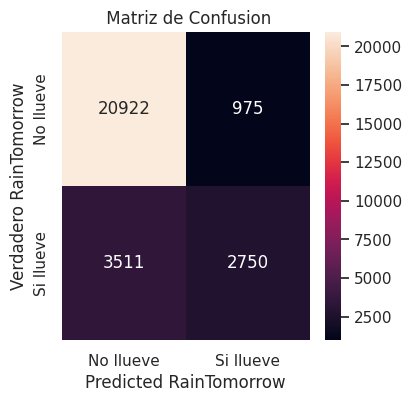

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     21897
           1       0.74      0.44      0.55      6261

    accuracy                           0.84     28158
   macro avg       0.80      0.70      0.73     28158
weighted avg       0.83      0.84      0.82     28158

Precisión del modelo: 0.738255033557047


In [ ]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 4))
sns.heatmap(matriz, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title(" Matriz de Confusion")
plt.ylabel('Verdadero RainTomorrow')
plt.xlabel('Predicted RainTomorrow')
plt.show()
print (classification_report(y_test, y_pred_svm))

#print('Matriz de Confusión:')
#print(matriz)
# Se calcula la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_svm)
print('Precisión del modelo:', precision)

Para la clase 0 (sin lluvia):

Precision: 86% de las veces que el modelo predijo que no habría lluvia, acertó.

Recall: El 96% de las veces que realmente no hubo lluvia, el modelo lo predijo
correctamente.

F1-score: La medida F1 es del 90% para esta clase, que es una métrica equilibrada entre precisión y recall.

Para la clase 1 (con lluvia):

Precision: 74% de las veces que el modelo predijo que habría lluvia, efectivamente la hubo.

Recall: Solo el 44% de las veces que realmente hubo lluvia, el modelo lo predijo correctamente.

F1-score: El F1-score para esta clase es del 55%, indicando un rendimiento medio en la predicción de casos de lluvia.

Precisión del Modelo:

La precisión del modelo para predecir correctamente la clase 1 (lluvia) es del 73.83%.

El modelo SVM muestra una buena capacidad para predecir la clase 0 (sin lluvia), con alta precisión y recall.

Sin embargo, para la clase 1 (con lluvia), aunque la precisión es aceptable, el recall es relativamente bajo, lo que indica que el modelo tiene dificultades para identificar correctamente los casos de lluvia.

Considerando la naturaleza desbalanceada de los datos (más instancias de clase 0 que de clase 1), sería importante explorar técnicas adicionales de ajuste de modelos o manejo de desbalance para mejorar la capacidad de predicción del modelo para la clase minoritaria.

La precisión del modelo para la clase 1 es la más alta entre los tres modelos 0.75, lo que indica que tiene menos falsos positivos en comparación con los otros modelos.
El recall para la clase 1 es bajo 0.42, similar al del Árbol de Decisión, lo que indica que el modelo tiene dificultades para identificar correctamente los casos positivos.
El puntaje F1 para la clase 1 es más alto que el de los otros dos modelos 0.54, lo que indica un desempeño generalmente mejor.

In [ ]:
# Añadir las predicciones al DataFrame original
df_results_svm = X_test.copy()
df_results_svm['Prediccion_SVM'] = y_pred_svm
df_results_svm['Lluvia_Mañana'] = y_test.values


NameError: name 'y_pred_svm' is not defined

**CONCLUSION**
Ninguno de los modelos tiene un desempeño muy satisfactorio en la predicción de lluvia. Se debe  ajustar los hiperparámetros de los modelos.

##**Modelo  K-Means**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
import pandas as pd

# Aquí se asume que tienes un DataFrame llamado df con todas tus variables
# Seleccionar las variables específicas
selected_columns = ['Temp_minima', 'Temp_maxima', 'VelRafaga', 'Vel_viento9am', 'Vel_viento3pm', 'Humedad_9am', 'presion_atm_9am',
                    'presion_atm_3pm', 'Temp9am']

# Crear el nuevo DataFrame df_means con las variables seleccionadas
df_knn = df[selected_columns].copy()

# Verificar que se haya creado correctamente
df_knn.head() # Mostrar las primeras filas para verificar

# Ahora df_means contiene solo las columnas seleccionadas

KeyError: "['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm'] not in index"

**Estandarizacion de los datos**

In [ ]:
# Estandarización de los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)


##**Metodo Elbow**

Se hace un grafico de la función objetivo en función de la elección de k y se elige el k correspondiente al punto donde agregar un cluster más no baja significativamente el valor que queremos minimzar. Esto se puede detectar a ojo o utilizando algún paquete de python como 'kneed'

In [ ]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir el rango de números de clusters que queremos probar
num_clusters = range(1, 20)
inertias = []  # Sum of Squared Errors

# Aplicar K-Means para cada número de clusters y guardar la inercia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Encontrar el punto de inflexión usando KneeLocator
knee = KneeLocator(num_clusters, inertias, curve='convex', direction='decreasing')

# Graficar la curva de SSE vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertias, marker='o', linestyle='-', color='b')
plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve con método de la rodilla (knee)')
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters según el método de la rodilla es: {knee.elbow}")


##**Aplicar K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_df)

# Añadir los clusters al dataset original
df1['Cluster'] = clusters

In [ ]:
# Añadir las etiquetas de cluster al DataFrame original
df1['Cluster'] = cluster_labels

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

 **Centroides**

 los centroides de cada cluster después de aplicar el algoritmo K-Means. Cada fila corresponde a un cluster y cada columna muestra el valor medio de una variable climática específica para ese cluster. Aquí tienes un análisis básico basado en los centroides

In [ ]:
from sklearn.metrics import classification_report, mean_squared_error, r2_score

# Evaluación de modelos de clasificación
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes - Reporte de Clasificación:")
print(classification_report(y_test_clasificacion, y_pred_nb))

y_pred_tree = tree_model.predict(X_test)
print("Árbol de Decisión - Reporte de Clasificación:")
print(classification_report(y_test_clasificacion, y_pred_tree))

y_pred_svm = svm_model.predict(X_test)
print("SVM - Reporte de Clasificación:")
print(classification_report(y_test_clasificacion, y_pred_svm))

# Evaluación de modelos de regresión
y_pred_lr = lr_model.predict(X_test_regresion)
print("Regresión Lineal - Métricas:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_regresion, y_pred_lr)}")
print(f"Coeficiente de Determinación (R^2): {r2_score(y_test_regresion, y_pred_lr)}")

y_pred_knn = knn_model.predict(X_test_regresion)
print("KNN - Métricas:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_regresion, y_pred_knn)}")
print(f"Coeficiente de Determinación (R^2): {r2_score(y_test_regresion, y_pred_knn)}")
